# Problem 1: Linear Regression

### You are hired by a company named Gem Stones Co Ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of approximately 27,000 pieces of cubic zirconia (which is an inexpensive synthesized diamond alternative with similar qualities of a diamond).

### Your objective is to accurately predict prices of the zircon pieces. Since the company profits at a different rate at different price levels, for revenue management, it is important that prices are predicted as accurately as possible. At the same time, it is important to understand which of the predictors are more important in determining the price.

## The data dictionary is given below:

1. Carat: Carat weight of the cubic zirconia


2. Cut: Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.


3. Colour: Colour of the cubic zirconia. D being the best and J the worst.


4. Clarity: Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1


5. Depth: The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.


6. Table: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.


7. Price: The Price of the cubic zirconia.


8. X: Length of the cubic zirconia in mm.


9. Y: Width of the cubic zirconia in mm.


10. Z: Height of the cubic zirconia in mm.


Following is a guideline for developing a solution:

1. The very first step of any data analysis assignment is to do the exploratory data analysis (EDA). Once you have understood the nature of all the variables, identified the response and the predictors, apply appropriate methods to determine whether there is any duplicate observation or missing data and whether the variables have symmetric or skewed distribution. Note that data may contain various types of attributes and numerical and/or visual data summarization techniques need to be appropriately decided. Both univariate and bivariate analyses and pre-processing of data are important. Check for outliers and comment on removing or keeping them while model building. Since this is a regression problem, the dependence of the response on the predictors needs to be thoroughly investigated.


2. Use the Pre-processed Full Data to develop a model to identify significant predictors. Check whether the proposed model is free of multicollinearity. Apply variable selection method as required. Show all intermediate models leading to the final model. Justify your choice of the final model. Which are the significant predictors?


3. Alternatively, if prediction accuracy of the price is the only objective, then you may want to divide the data into a training and a test set, chosen randomly, and use the training set to develop a model and test set to validate your model. Use the models developed in Part (2) to compare accuracy in training and test sets. Compare the final model of Part (2) and the proposed one in Part (3). Which model provides the most accurate prediction? If the model found in Part (2) is different from the proposed model in Part (3), give an explanation.
Write a project report on the solution method, clearly highlighting the benefits of all the  approaches. Your report must indicate the logic of model selection and business interpretation.

## Loading the required packages

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.formula.api as SM
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_squared_error

import math
from scipy.stats import zscore

import statsmodels.api as sm

## Loading dataset

- Loading the cubic zirconia dataset as a dataframe into df_cubic

In [2]:
df_cubic = pd.read_csv('cubiczirconia.csv')

## Checking first 5 rows

- First five rows of the dataset:

In [3]:
df_cubic.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


## Checking last 5 rows

- Last five rows of the dataset:

In [4]:
df_cubic.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [5]:
df_cubic.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

## Dropping Unnamed: 0 column

- Dropping Unnamed: 0 column as it is index and we don't have any use in building models

In [6]:
df_cubic = df_cubic.drop('Unnamed: 0', axis=1)

In [7]:
df_cubic.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


## Checking the dimensions of the dataset

In [8]:
df_cubic.shape

(26967, 10)

In [9]:
df_cubic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


## Checking for missing values and duplicate rows

In [10]:
df_cubic.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [11]:
dup = df_cubic.duplicated().sum()
dup

34

In [12]:
duplicate = df_cubic[df_cubic.duplicated()]
  
print("Duplicate Rows :")

duplicate

Duplicate Rows :


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898



- Inferences: 


- The dataset has a total of six independent variables - All are continuous, one target variable and three categorical variables 
- Shape (dimension) of the Dataset is (26967, 10)
- There are 697 NULL values present in the dataset
- 34 duplicate values are present in the dataset
- There are a total of 10 variables and 26967 records

## Replacing missing values with median

- We can choose to drop the rows with missing values
- However, here we are not dropping the rows
- We are replacing the missing values with median value

In [13]:
df_cubic.median()

carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.71
z           3.52
price    2375.00
dtype: float64

In [14]:
df_cubic = df_cubic.fillna(df_cubic.median())

In [15]:
df_cubic.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

- Now, we can see that there are no missing values in the dataset

## Dropping duplicate rows

In [16]:
dup = df_cubic.duplicated().sum()
dup

34

In [17]:
df_cubic.drop_duplicates(inplace=True)

In [18]:
dup = df_cubic.duplicated().sum()
dup

0

In [19]:
df_cubic.shape

(26933, 10)

## Univariate Analysis

### Summary statistics of the dataset

- To perform Univariate analysis on continuous variables, let us start with looking at the summary statistics of the dataset.   

In [20]:
df_cubic.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.746701,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.393875,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [21]:
df_cubic.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26933.0,61.746701,1.393875,50.8,61.10,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


- x,y,z are length, width and height respectively
- length, width and height cannot be '0' practically
- From the above table, we can see that the minimum value of x,y,z seems to be '0'

### Checking for the values equal to zero - x,y,z variables

In [22]:
print("Number of rows with x = 0 : {} ".format((df_cubic.x==0).sum()))
print("Number of rows with y = 0 : {} ".format((df_cubic.y==0).sum()))
print("Number of rows with z = 0 : {} ".format((df_cubic.z==0).sum()))
print("Number of rows with depth = 0 : {} ".format((df_cubic.depth==0).sum()))

Number of rows with x = 0 : 2 
Number of rows with y = 0 : 2 
Number of rows with z = 0 : 8 
Number of rows with depth = 0 : 0 


In [23]:
df_cubic = df_cubic[df_cubic.x != 0]
df_cubic = df_cubic[df_cubic.y != 0]
df_cubic = df_cubic[df_cubic.z != 0]

In [24]:
print("Number of rows with x = 0 : {} ".format((df_cubic.x==0).sum()))
print("Number of rows with y = 0 : {} ".format((df_cubic.y==0).sum()))
print("Number of rows with z = 0 : {} ".format((df_cubic.z==0).sum()))
print("Number of rows with depth = 0 : {} ".format((df_cubic.depth==0).sum()))

Number of rows with x = 0 : 0 
Number of rows with y = 0 : 0 
Number of rows with z = 0 : 0 
Number of rows with depth = 0 : 0 


In [25]:
df_cubic.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [26]:
df_cubic.shape

(26925, 10)

### Box Plots and Distribution Plots

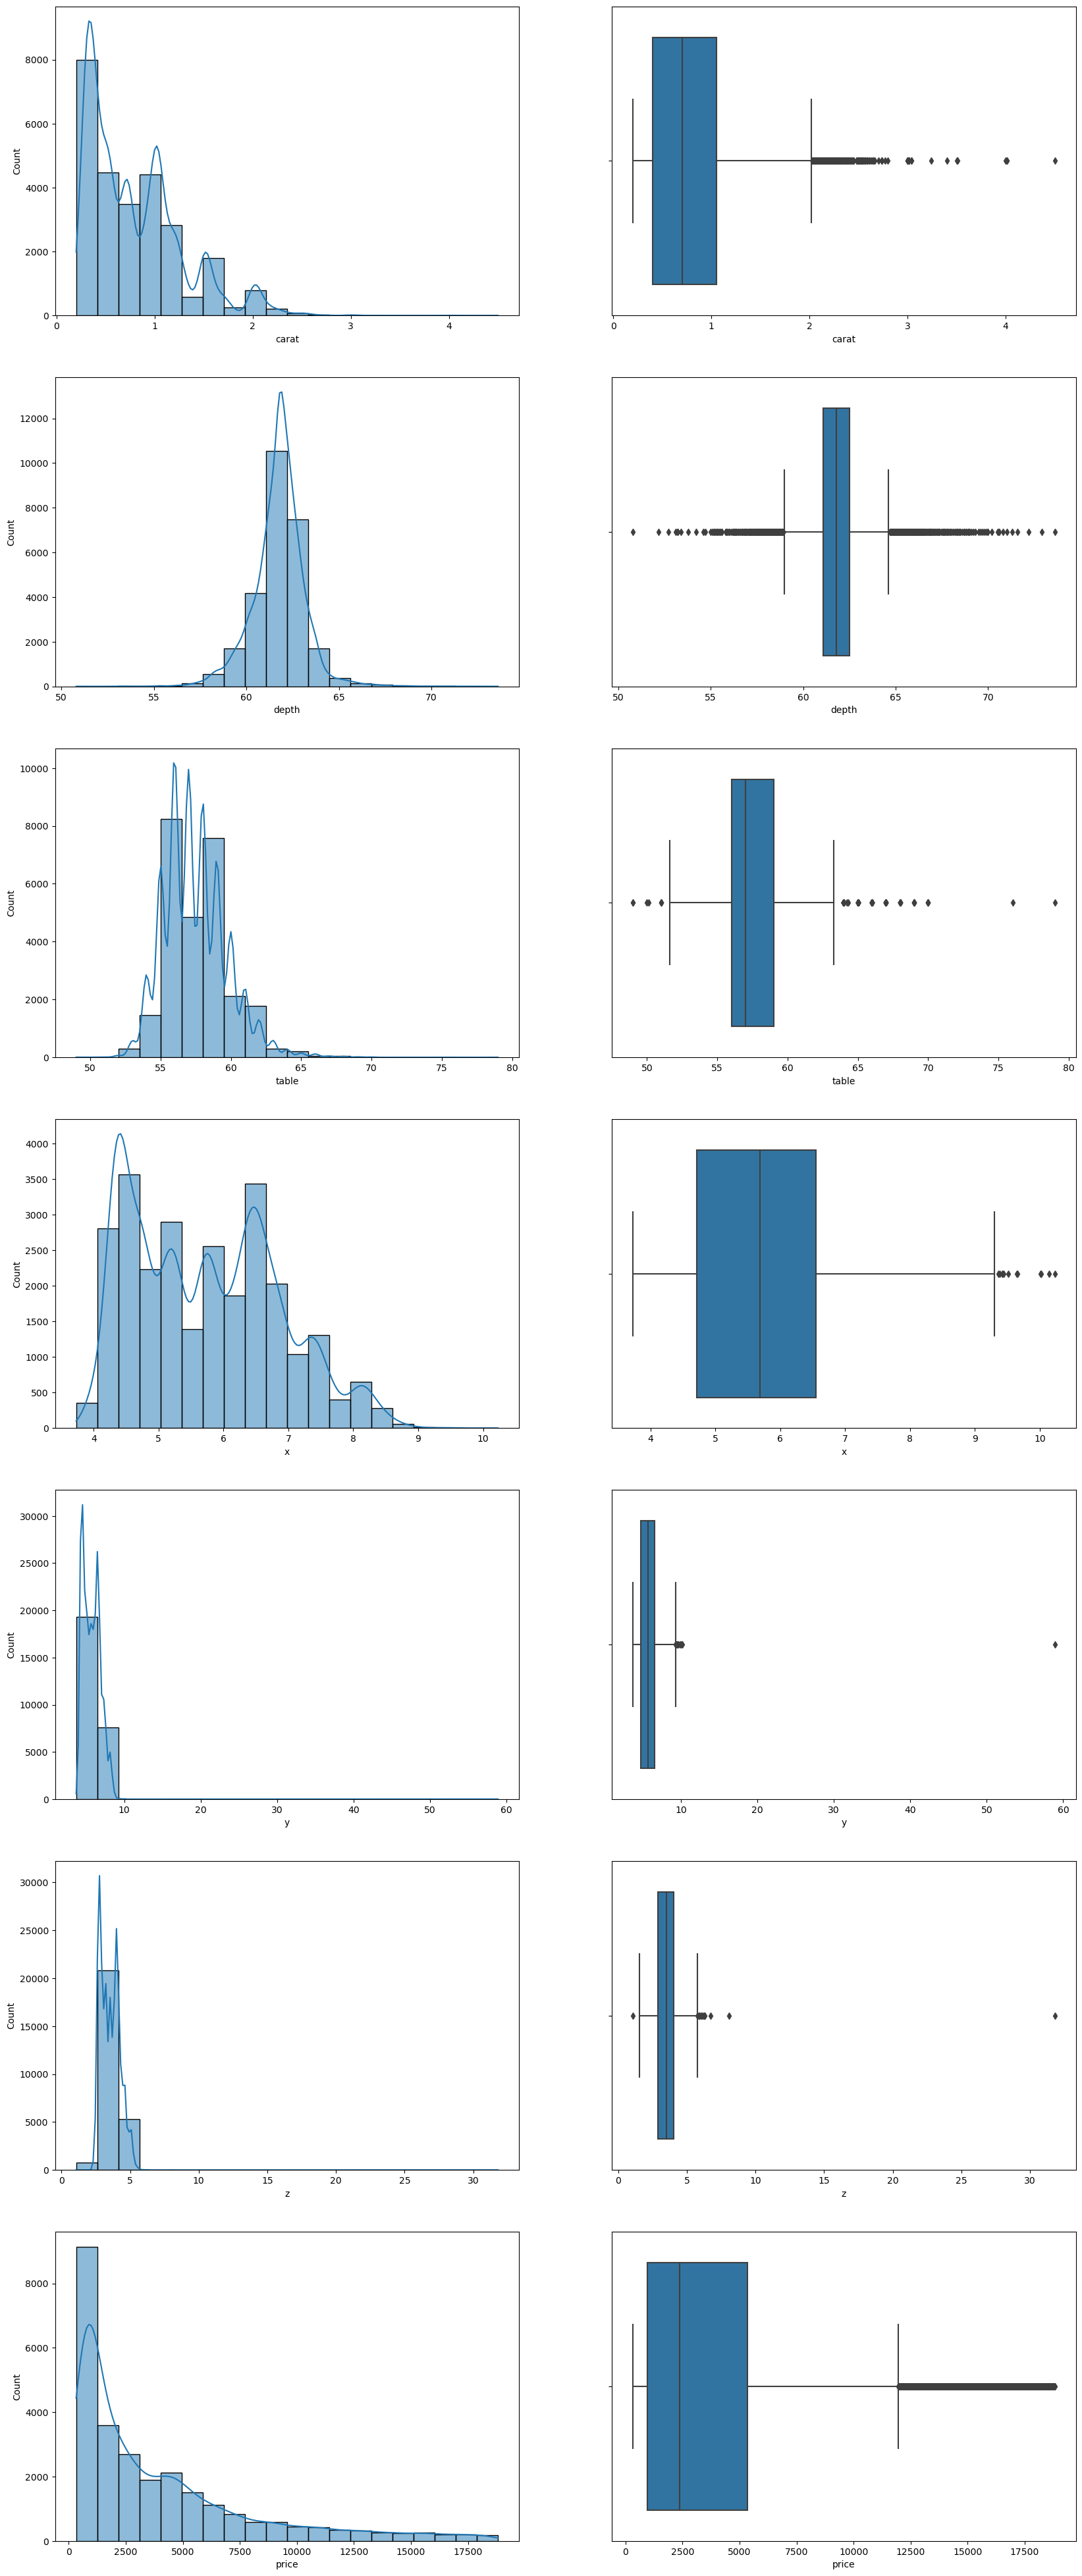

In [27]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(20,50)

sns.histplot(df_cubic['carat'], kde=True, bins=20, ax=axes[0][0])
sns.boxplot(x='carat', data=df_cubic, ax=axes[0][1])

sns.histplot(df_cubic['depth'] , kde=True, bins=20, ax=axes[1][0])
sns.boxplot(x='depth', data=df_cubic , ax=axes[1][1])

sns.histplot(df_cubic['table'], kde=True, bins=20, ax=axes[2][0])
sns.boxplot(x='table', data=df_cubic, ax=axes[2][1])

sns.histplot(df_cubic['x'] , kde=True, bins=20, ax=axes[3][0])
sns.boxplot(x='x', data=df_cubic , ax=axes[3][1])

sns.histplot(df_cubic['y'], kde=True, bins=20, ax=axes[4][0])
sns.boxplot(x='y', data=df_cubic, ax=axes[4][1])

sns.histplot(df_cubic['z'] , kde=True, bins=20, ax=axes[5][0])
sns.boxplot(x='z', data=df_cubic , ax=axes[5][1])

sns.histplot(df_cubic['price'], kde=True, bins=20, ax=axes[6][0])
sns.boxplot(x='price', data=df_cubic, ax=axes[6][1])

plt.show()

### Checking Outlier % of the dataset

In [28]:
Q1 = df_cubic.drop('price',axis=1).quantile(0.25)
Q3 = df_cubic.drop('price',axis=1).quantile(0.75)
IQR = Q3 - Q1

In [29]:
IQR

carat    0.65
depth    1.40
table    3.00
x        1.84
y        1.83
z        1.14
dtype: float64

In [30]:
pd.DataFrame(((df_cubic<(Q1-1.5*IQR))|(df_cubic>(Q3+1.5*IQR))).sum()/df_cubic.shape[0]*100, 
              columns = ["Outlier%"],index=None)

,Outlier%
carat,2.432683
clarity,0.000000
color,0.000000
cut,0.000000
depth,5.240483
price,0.000000
table,1.177344
x,0.044568
y,0.044568
z,0.051996


- Three  columns  have  outlier  values with a Percentage of 1.18,2.43,5.24 which is not very high as 20% 
- We can choose to treat outliers, however here we are not treating outliers as there might be an exceptional case where these values are possible for the business in certain cases.
- For example, carat variable gives the carat weight of the cubic zirconia. From the dataset, we can see that the weight of 3 and more than 3 are very less in number which are shown as outliers and there is no harm using them as the business can have a cubic zirconia with large carat weight. 
- As per the dataset, none of the values are so unrealistic. Hence, I am considering not to treat outliers for my analysis
- However, at the end we will build models after treating outliers just to check if that is making any difference in the performance

### Checking skewness in the dataset

In [31]:
pd.DataFrame(df_cubic.skew(), columns = ['Skewness'])

,Skewness
carat,1.114871
depth,-0.028403
table,0.764890
x,0.402010
y,3.888607
z,2.639529
price,1.619055


### Checking Kurtosis values

In [32]:
pd.DataFrame(df_cubic.kurtosis(), columns = ['Kurtosis'])

,Kurtosis
carat,1.212235
depth,3.863895
table,1.579418
x,-0.720965
y,160.727513
z,88.516471
price,2.152993


Inferences on Univariate analysis:

- From the Box plots, we can conclude that there are few outliers present in x,y,z,table variables. 
- Variable depth is normally distributed and variable carat is right skewed.
- Variables Carat, Table, x, y and z have multi-modal distributions.
- Kurtosis values for all variables are very high, not near to normal distribution
- There is extreme positive kurtosis seen in few variables which is > 3 which means more of the values are located in the tails of the distribution rather than around the mean.
- We can see that the distribution of some quantitative features like "carat" and the target feature "price" are heavily "right-skewed".


## Multi-Variate Analysis

- Analyzing the relationship among continuous variables by using Pair plot and Correlation Heatmap.

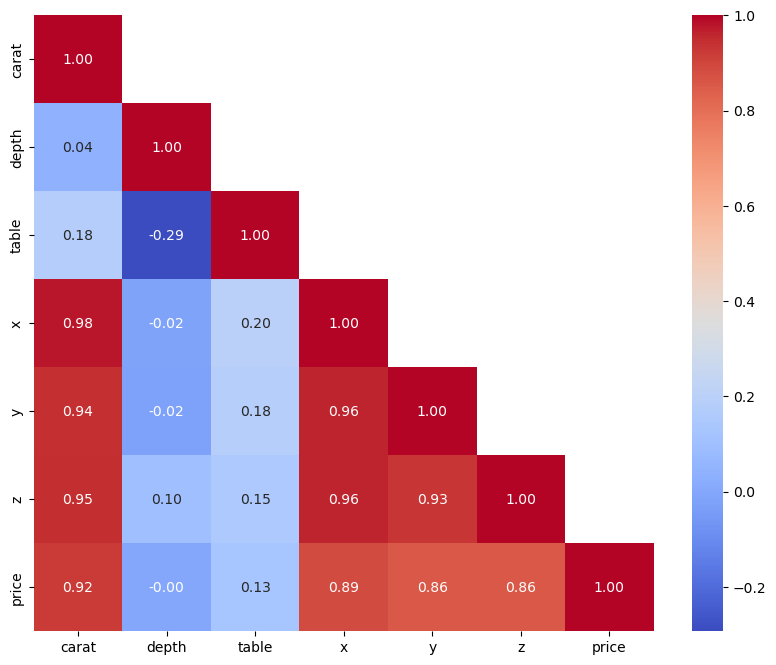

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df_cubic.corr(),annot=True,fmt=".2f",mask=np.triu(df_cubic.corr(),1), cmap = 'coolwarm');

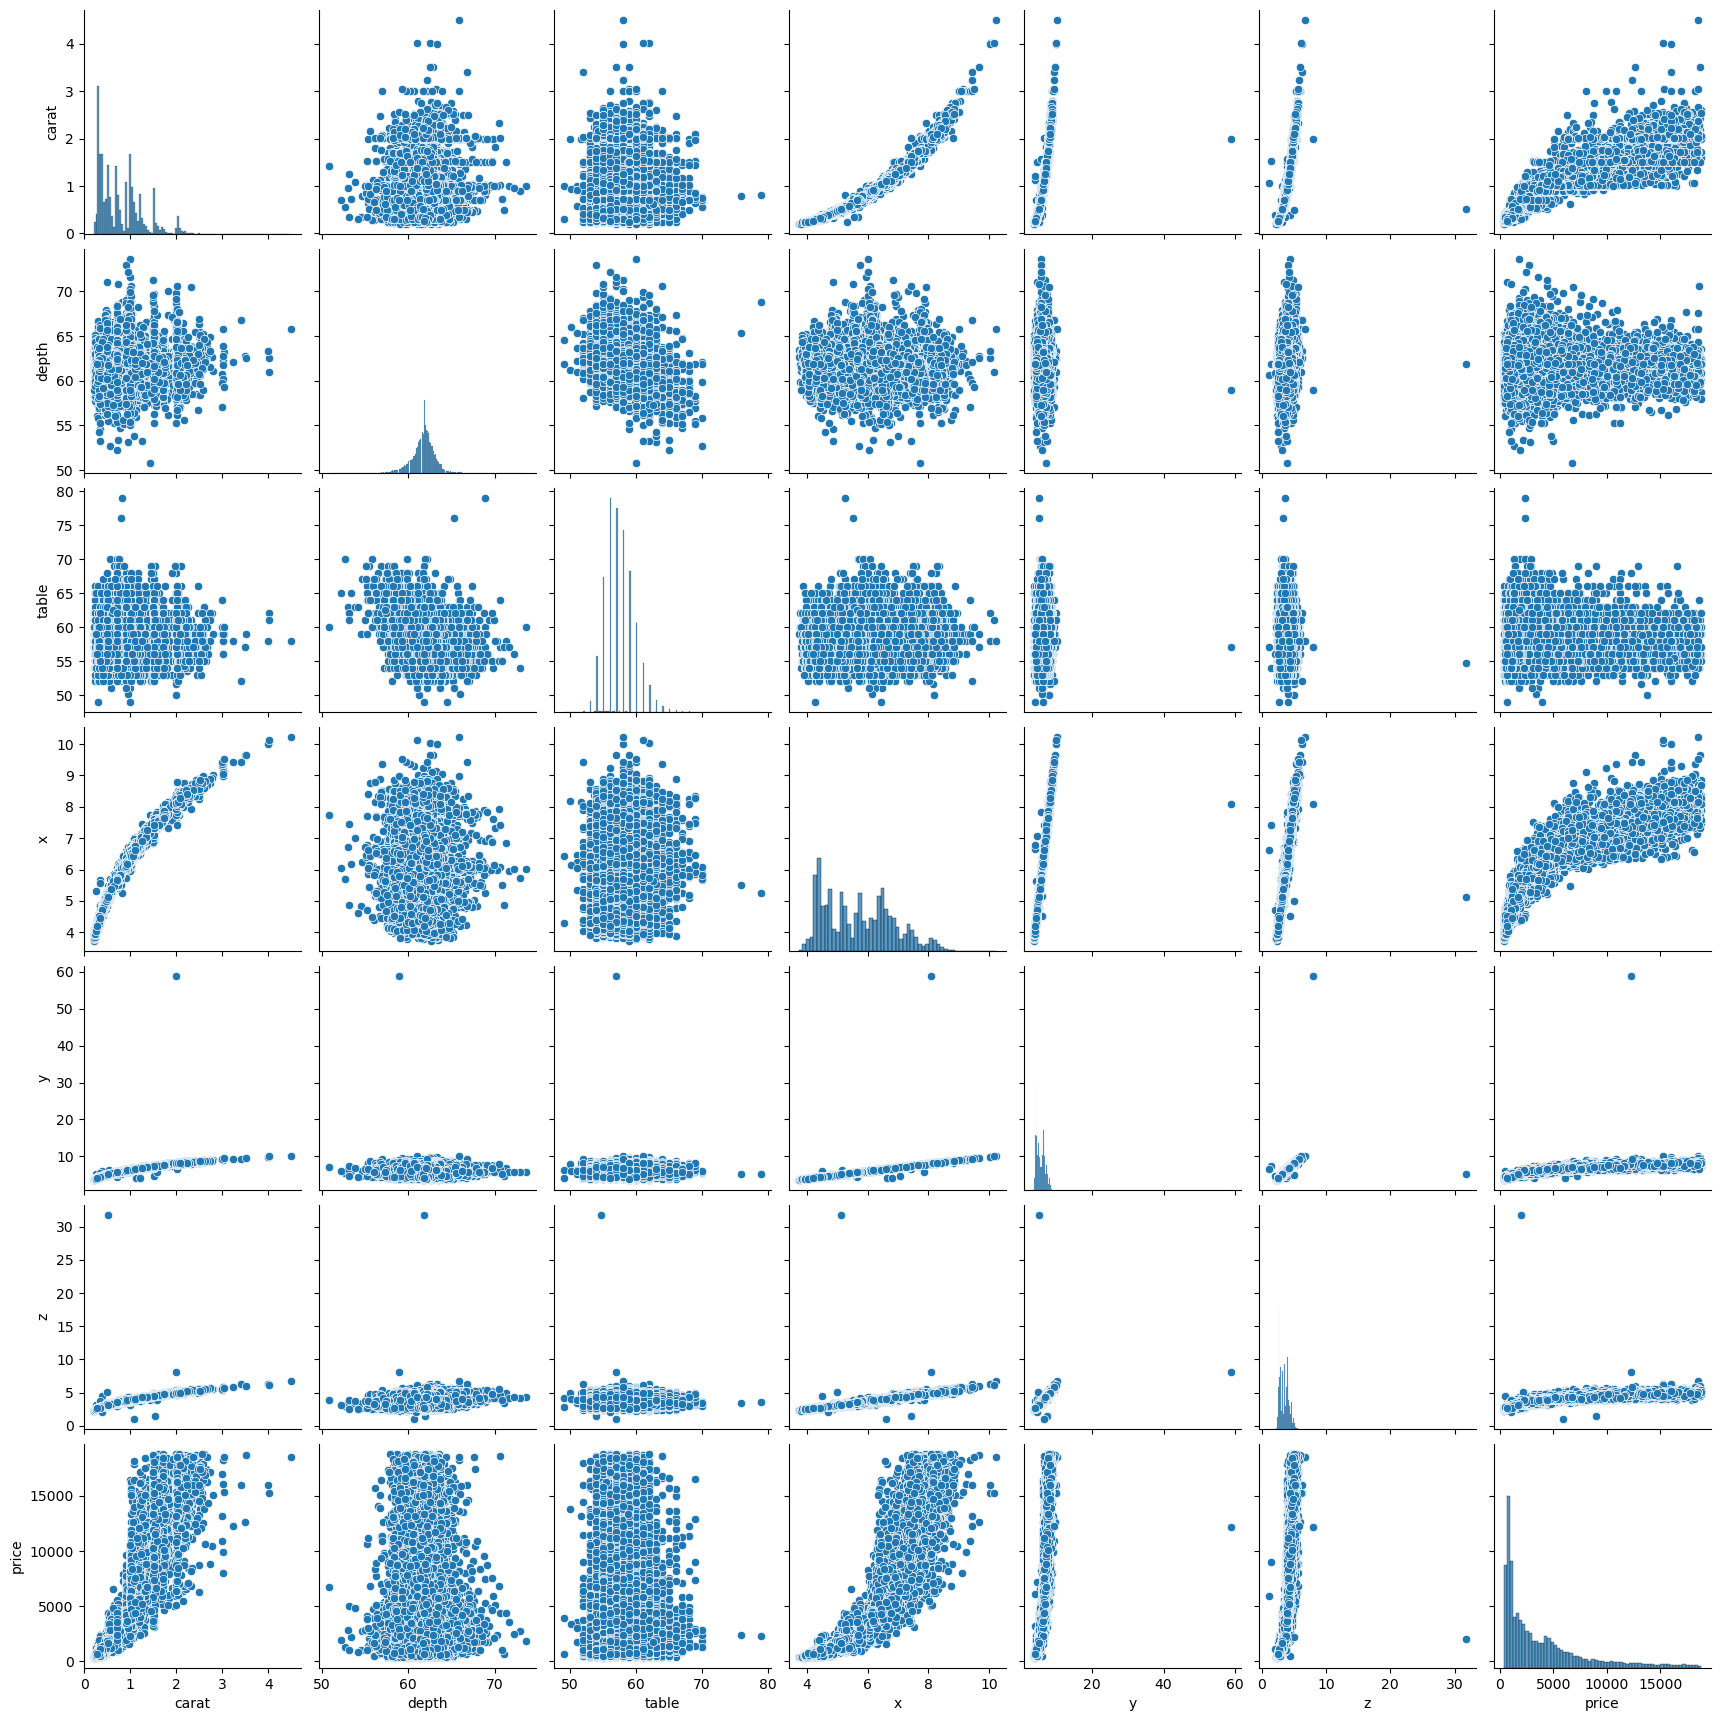

In [34]:
sns.pairplot(df_cubic);

Inferences:

- x,y,z variables are highly positively correlated with carat variable 
- z is highly correlated with x and y
- y is highly correlated with x
- Top Negative correlation pair is table and depth (-0.29)
- From pairplot, we see that as the carat weight increases the length(x) is also increasing showing a positive relationship
- Few of the variables have no correlation with each other, i.e., datapoints are spread wideacross(ex: carat and depth, carat and table). There might be small amount of correlation but there is no particular trend

## EDA for categorical variables

In [35]:
df_cubic.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


- we have 3 categorical variables - cut, color, clarity

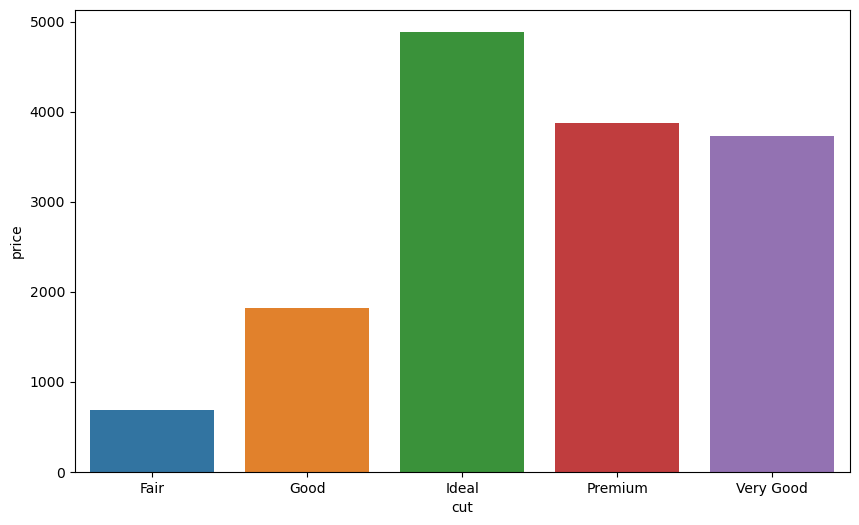

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
data = df_cubic.groupby('cut')[['price']].nunique()
data = data.reset_index()
sns.barplot(x = data.cut,y=data.price,ax=ax)
plt.xlabel('cut')
plt.show()

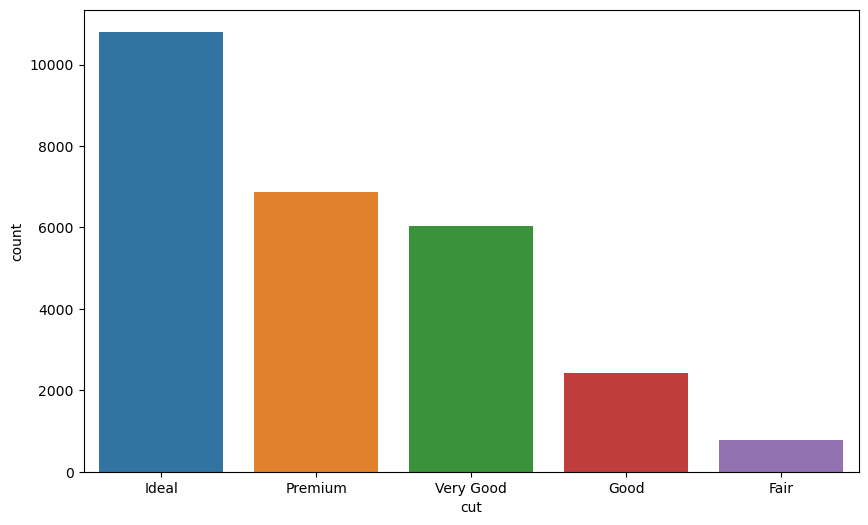

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x=df_cubic.cut);

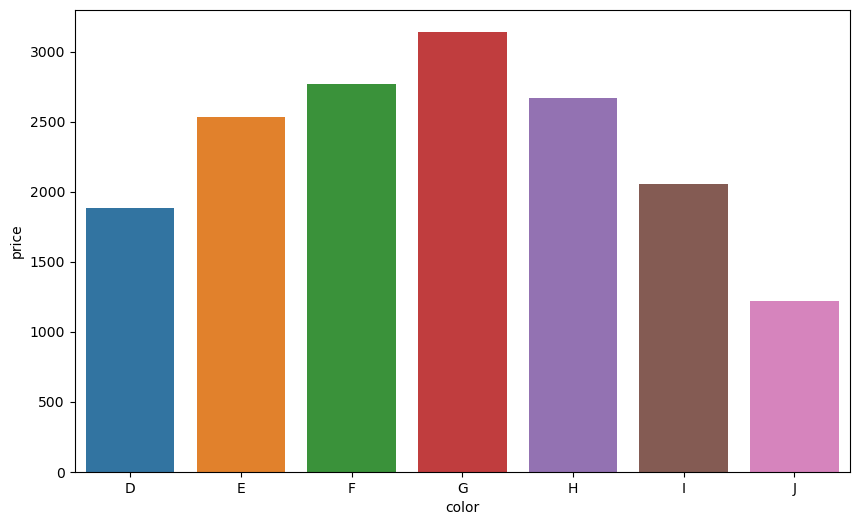

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
data = df_cubic.groupby('color')[['price']].nunique()
data = data.reset_index()
sns.barplot(x = data.color,y=data.price,ax=ax)
plt.xlabel('color')
plt.show()

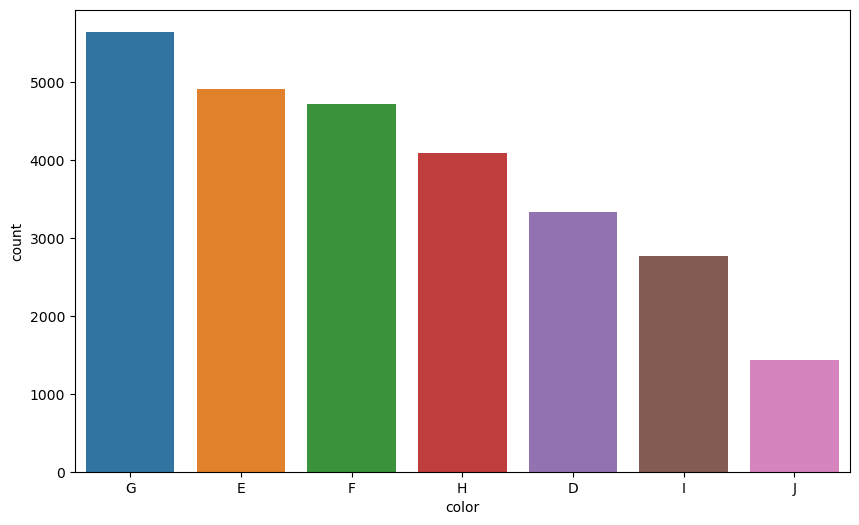

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x=df_cubic.color,order=df_cubic['color'].value_counts().index);

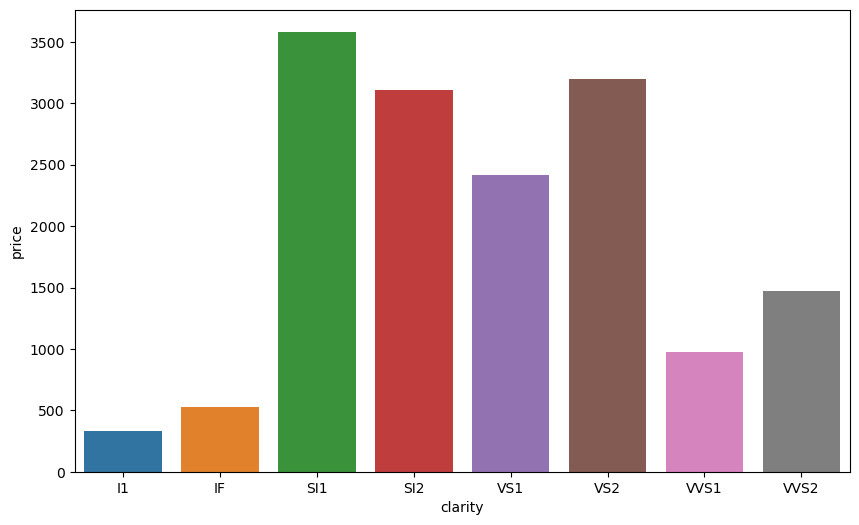

In [40]:
fig, ax = plt.subplots(figsize=(10,6))
data = df_cubic.groupby('clarity')[['price']].nunique()
data = data.reset_index()
sns.barplot(x = data.clarity,y=data.price,ax=ax)
plt.xlabel('clarity')
plt.show()

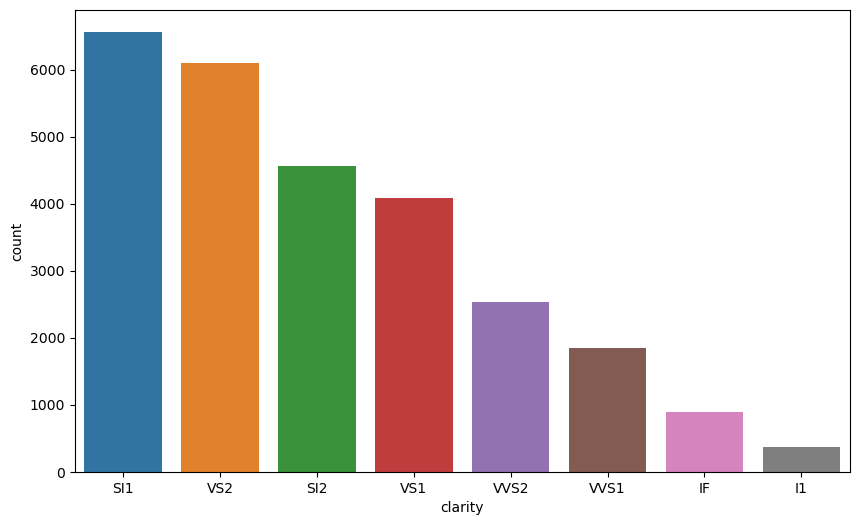

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x=df_cubic.clarity,order=df_cubic['clarity'].value_counts().index);

The inferences drawn from the above Exploratory Data analysis:



- 'Price' is the target variable while all others are the predictors. 

- The data set contains 26967 rows, 11 columns. 

- In the given data set there are 2 Integer type features, 6 Float type features, 3 Object type features.

- The first column is an index ("Unnamed: 0"). As this is only serial no, we can remove it.

- In the given data set, the mean and median values does not have much difference. 

- We can observe Min value of "x", "y", "z" are zero. This indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible, we have filtered those as it clearly shows faulty data entries. 

- There are three object data types 'cut', 'color' and 'clarity'.

- We can observe there are 697 missing values in the depth column. There are some duplicate rows present, nearly 0.12 % of the total data. So in this case we have dropped the duplicated rows.

- There are significant amount of outliers present in some variables, the features with datapoints that are far from the rest of the dataset which will affect the outcome of our regression model. However, they are not unrealistic values.

- So we can choose to treat or not treat the outliers. We can see that the distribution of some quantitative features like "carat" and the target feature "price" are heavily "right-skewed".

- It looks like most features do correlate with the price of cubic zirconia.Observation on 'cut': The Premium Cut on Diamonds are the most Expensive, followed by Very Good Cut.


Scaling:

- Scaling is not necessary, we'll get an equivalent solution whether we apply some kind of linear scaling or not. But recommended for regression techniques as well because it would help gradient descent to converge fast and reach the global minima. When number of features becomes large, it helps in running model quickly else the starting point would be very far from minima if the scaling is not done in preprocessing.

- For now we will process the model without scaling and we will also check the output with scaled data of regression model output to check if the performance is changing

## Simple Linear Regression

In [42]:
df_cubic.corrwith(df_cubic.price)

carat    0.922400
depth   -0.002683
table    0.126967
x        0.887467
y        0.857255
z        0.855775
price    1.000000
dtype: float64

- Carat variable has high correlation of 0.92
- Hence, using carat variable as independent variable and price as target variable
- Checking the distribution using scatter plot and building a simple regression model with one variable

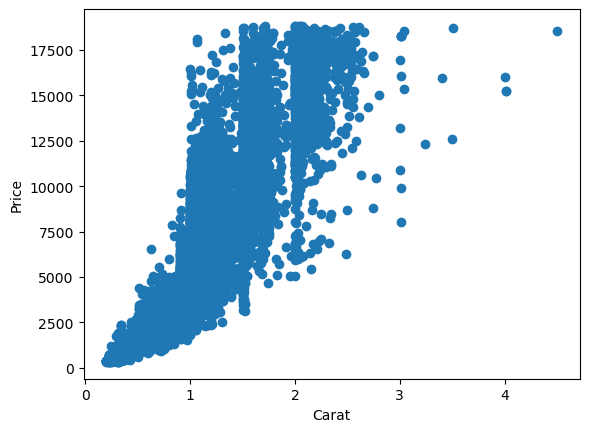

In [43]:
plt.scatter(df_cubic['carat'],df_cubic['price'])
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

- There is a positive correlation, as carat weight increases, price increases

In [44]:
formula_slr = 'price~carat'
model_slr = SM.ols(formula=formula_slr, data=df_cubic).fit()
model_slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.536e+05
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:30:01   Log-Likelihood:            -2.3605e+05
No. Observations:               26925   AIC:                         4.721e+05
Df Residuals:                   26923   BIC:                         4.721e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2266.1749     18.442   -122.880      0.000   -2302.323   -2230.027
carat       7774.2063     19.839    391.859      0.000    7735.320    7813.092
==============================================================================
Omnibus:                     6768.730   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63464.268
Skew:                           0.942   Prob(JB):                         0.00
Kurtosis:                      10.282   Cond. No.                         3.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Around 85% variability in the dependent variable is being explained by the 'Carat' variable.

In [45]:
model_name = []
model_perf = []
no_of_x_variables = []
x_variables_included = []
model_name.append('simple linear regression')
model_perf.append(model_slr.rsquared_adj)
no_of_x_variables.append(1)
x_variables_included.append('carat')

## Simple Linear Regression on scaled data

In [46]:
df_carat_scaled = pd.DataFrame(df_cubic['carat']).apply(zscore)
df_price_scaled = pd.DataFrame(df_cubic['price']).apply(zscore)

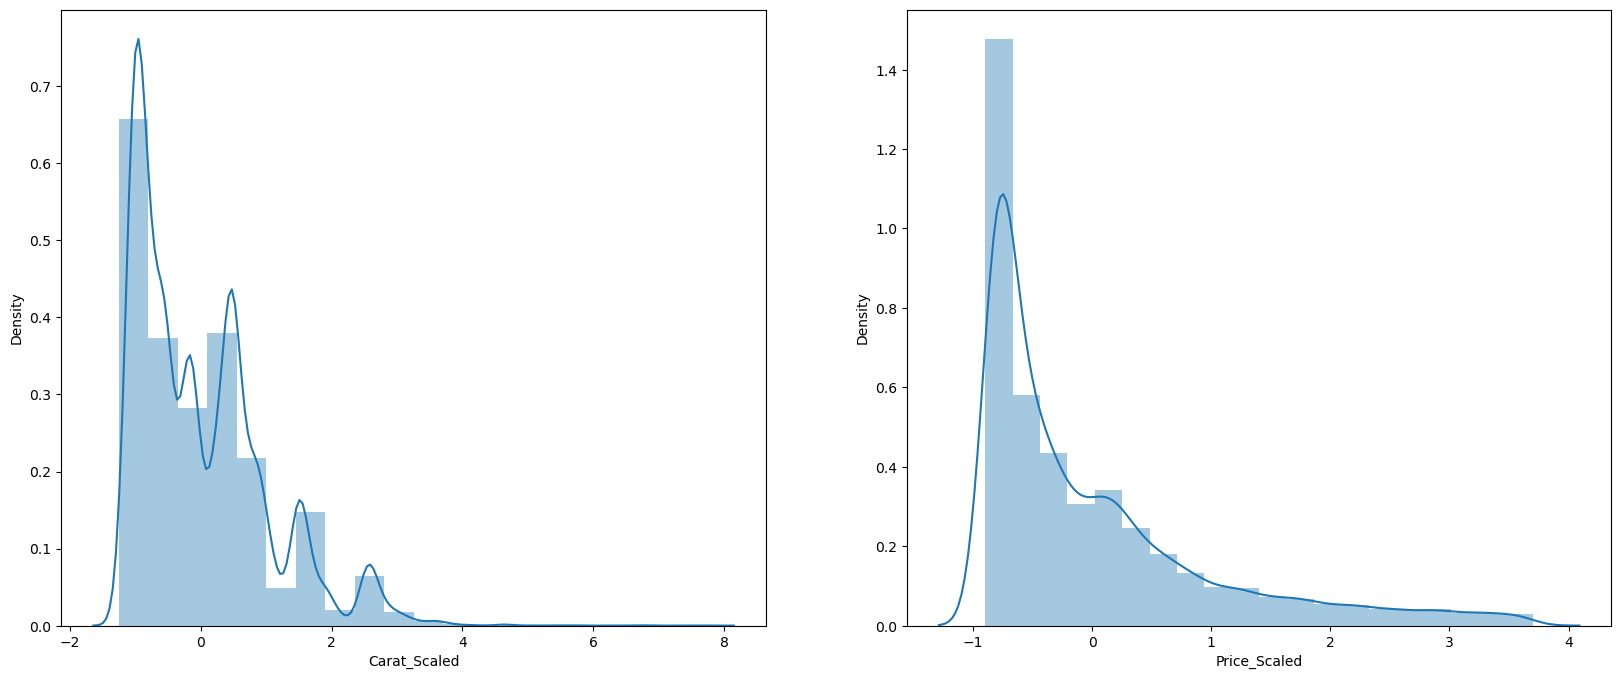

In [47]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.distplot(df_carat_scaled, kde=True, bins=20)
plt.xlabel('Carat_Scaled')

plt.subplot(1,2,2)
sns.distplot(df_price_scaled, kde=True, bins=20)
plt.xlabel('Price_Scaled')

plt.show()


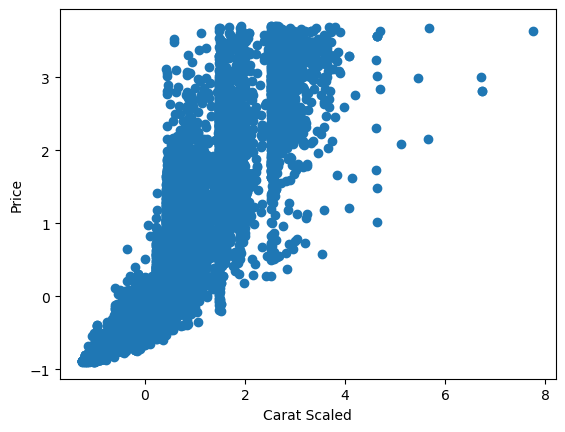

In [48]:
plt.scatter(df_carat_scaled,df_price_scaled)
plt.xlabel('Carat Scaled')
plt.ylabel('Price')
plt.show()

- The distributions are similar for both scaled and unscaled data

In [49]:
model_slr_scaled = SM.ols('df_price_scaled~df_carat_scaled', data=df_cubic).fit()
model_slr_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        df_price_scaled   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.536e+05
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:30:02   Log-Likelihood:                -12591.
No. Observations:               26925   AIC:                         2.519e+04
Df Residuals:                   26923   BIC:                         2.520e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.337e-19      0.002   1.84e-16      1.000      -0.005       0.005
df_carat_scaled     0.9224      0.002    391.859      0.000       0.918       0.927
==============================================================================
Omnibus:                     6768.730   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63464.268
Skew:                           0.942   Prob(JB):                         0.00
Kurtosis:                      10.282   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Around 85% variability in the dependent variable is being explained by the 'Carat' variable after scaling the data.
- Performance of the model is same for both scaled and unscaled data.
*We see that the **${R^2}$ value has remained the same after this transformation.** We can say that scaling a variable for Linear Regression will give us the same values as compared to the unscaled variables.

In [50]:
model_name.append('simple linear regression scaled')
model_perf.append(model_slr_scaled.rsquared_adj)
no_of_x_variables.append(1)
x_variables_included.append('carat(scaled)')

## Data Preprocessing

- Converting all the categorical variables into numerical variables

In [51]:
df_cubic.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [52]:
df_cubic_pp = df_cubic.copy()

## pp - preprocessing

1. Cut: Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.


2. Colour: Colour of the cubic zirconia. D being the best and J the worst.


3. Clarity: Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1

In [53]:
df_cubic_pp['cut']=np.where(df_cubic_pp['cut'] =='Ideal', '4', df_cubic_pp['cut'])
df_cubic_pp['cut']=np.where(df_cubic_pp['cut'] =='Premium', '3', df_cubic_pp['cut'])
df_cubic_pp['cut']=np.where(df_cubic_pp['cut'] =='Very Good', '2', df_cubic_pp['cut'])
df_cubic_pp['cut']=np.where(df_cubic_pp['cut'] =='Good', '1', df_cubic_pp['cut'])
df_cubic_pp['cut']=np.where(df_cubic_pp['cut'] =='Fair', '0', df_cubic_pp['cut'])

df_cubic_pp['color']=np.where(df_cubic_pp['color'] =='D', '6', df_cubic_pp['color'])
df_cubic_pp['color']=np.where(df_cubic_pp['color'] =='E', '5', df_cubic_pp['color'])
df_cubic_pp['color']=np.where(df_cubic_pp['color'] =='F', '4', df_cubic_pp['color'])
df_cubic_pp['color']=np.where(df_cubic_pp['color'] =='G', '3', df_cubic_pp['color'])
df_cubic_pp['color']=np.where(df_cubic_pp['color'] =='H', '2', df_cubic_pp['color'])
df_cubic_pp['color']=np.where(df_cubic_pp['color'] =='I', '1', df_cubic_pp['color'])
df_cubic_pp['color']=np.where(df_cubic_pp['color'] =='J', '0', df_cubic_pp['color'])

df_cubic_pp['clarity']=np.where(df_cubic_pp['clarity'] =='IF', '7', df_cubic_pp['clarity'])
df_cubic_pp['clarity']=np.where(df_cubic_pp['clarity'] =='VVS1', '6', df_cubic_pp['clarity'])
df_cubic_pp['clarity']=np.where(df_cubic_pp['clarity'] =='VVS2', '5', df_cubic_pp['clarity'])
df_cubic_pp['clarity']=np.where(df_cubic_pp['clarity'] =='VS1', '4', df_cubic_pp['clarity'])
df_cubic_pp['clarity']=np.where(df_cubic_pp['clarity'] =='VS2', '3', df_cubic_pp['clarity'])
df_cubic_pp['clarity']=np.where(df_cubic_pp['clarity'] =='SI1', '2', df_cubic_pp['clarity'])
df_cubic_pp['clarity']=np.where(df_cubic_pp['clarity'] =='SI2', '1', df_cubic_pp['clarity'])
df_cubic_pp['clarity']=np.where(df_cubic_pp['clarity'] =='I1', '0', df_cubic_pp['clarity'])

In [54]:
df_cubic_pp.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,5,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,7,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2,5,5,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4,4,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4,4,6,60.4,59.0,4.35,4.43,2.65,779


In [55]:
df_cubic_pp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


- converting object to float

In [56]:
df_cubic_pp['cut'] = df_cubic_pp['cut'].astype('float64')
df_cubic_pp['color'] = df_cubic_pp['color'].astype('float64')
df_cubic_pp['clarity'] = df_cubic_pp['clarity'].astype('float64')

In [57]:
df_cubic_pp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  float64
 2   color    26925 non-null  float64
 3   clarity  26925 non-null  float64
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 2.3 MB


#### Let us now check the correlation amongst the predictor variables just to make sure that the predictor variables are not highly correlated amongst themselves.

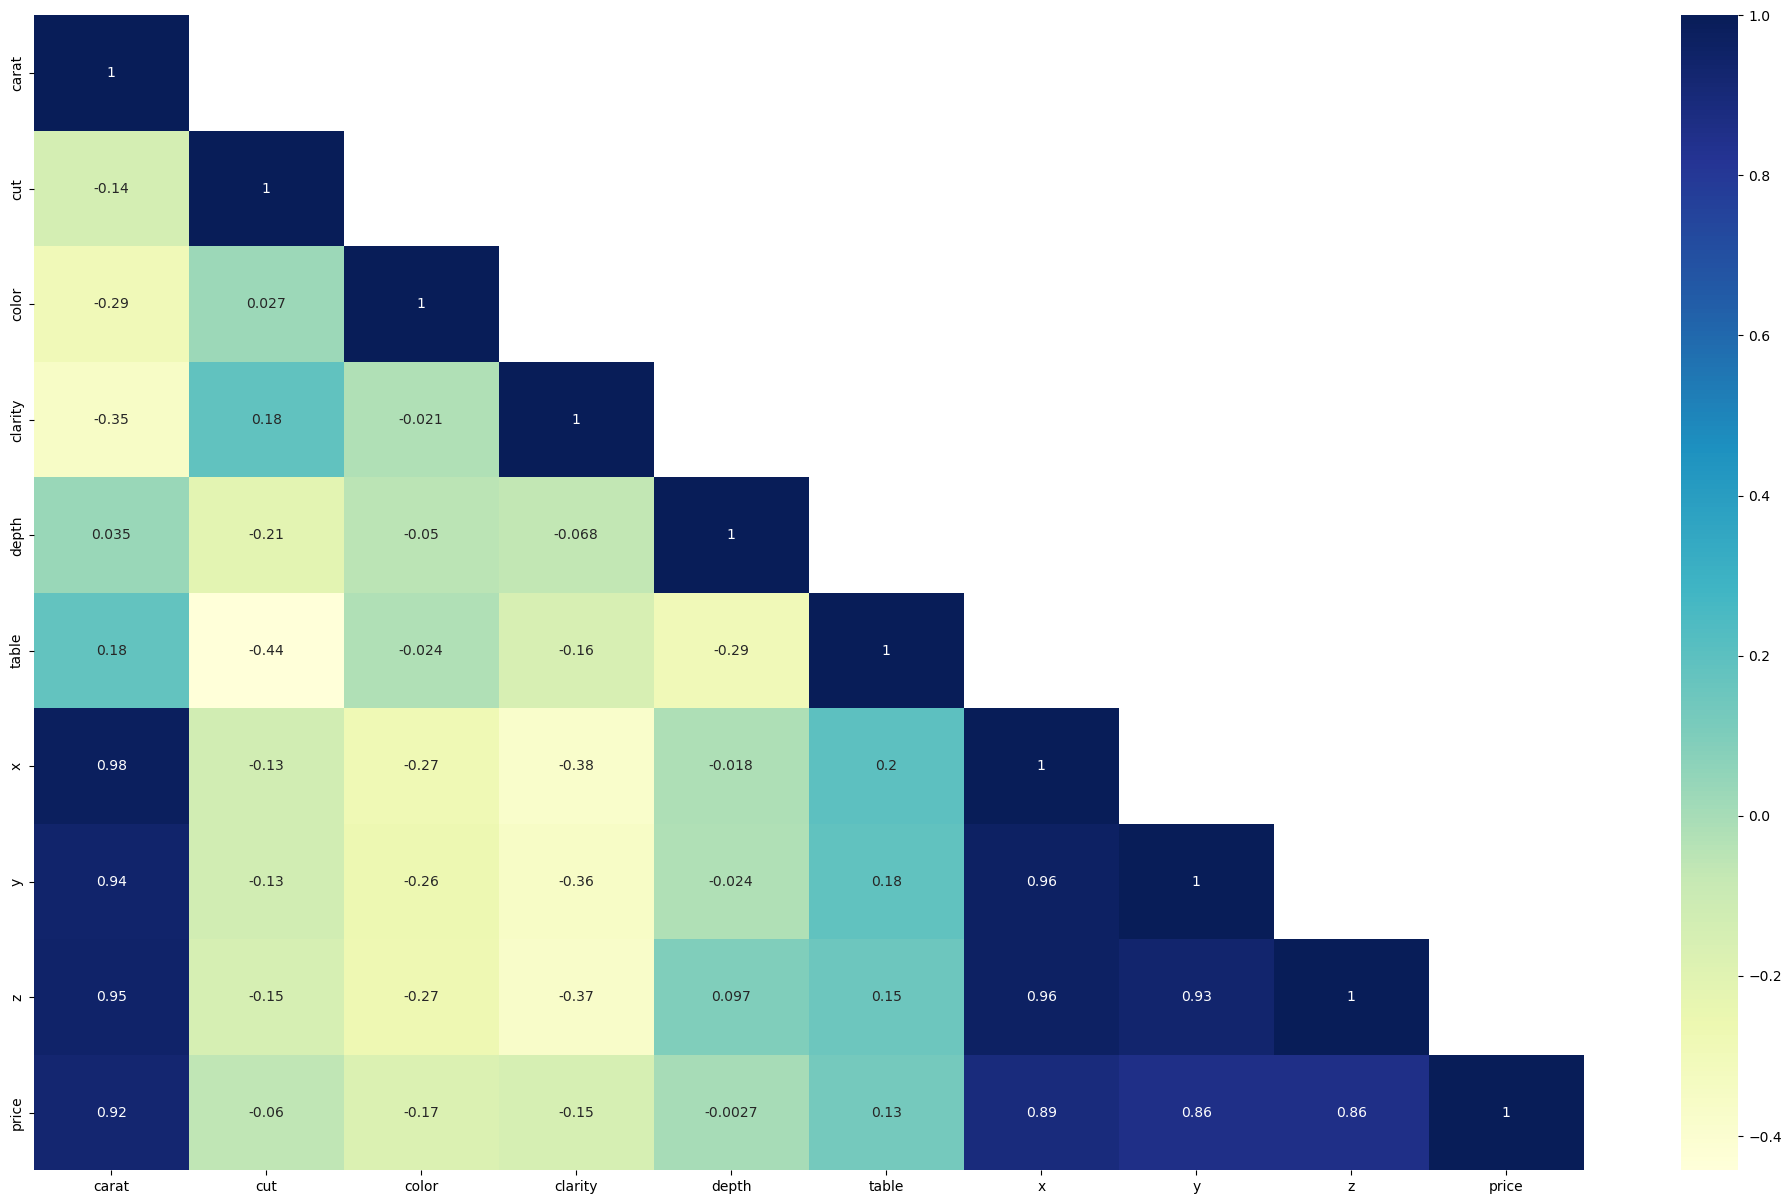

In [58]:
plt.figure(figsize=(25,15))
sns.heatmap(df_cubic_pp.corr(), annot=True, mask=np.triu(df_cubic_pp.corr(),1), cmap = 'YlGnBu')
plt.show()

- There is high correlation between few variables. 
- However, we will build a model with all levels of categorical variables to check the performance

## Model 1: Model with all variables included

In [59]:
df_cubic_pp.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779


In [60]:
df_cubic_pp.shape

(26925, 10)

In [61]:
df_cubic_pp.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [62]:
formula_mlr_1 = 'price~carat+cut+color+clarity+depth+table+x+y+z'


In [63]:
model_mlr_1 = SM.ols(formula=formula_mlr_1, data=df_cubic_pp).fit()
model_mlr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.969e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:30:03   Log-Likelihood:            -2.2947e+05
No. Observations:               26925   AIC:                         4.590e+05
Df Residuals:                   26915   BIC:                         4.590e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4604.1277    605.265      7.607      0.000    3417.777    5790.479
carat       1.103e+04     77.677    141.963      0.000    1.09e+04    1.12e+04
cut          117.0032      8.141     14.372      0.000     101.046     132.960
color        328.1337      4.601     71.325      0.000     319.116     337.151
clarity      499.0037      4.994     99.921      0.000     489.215     508.792
depth        -84.5133      6.716    -12.585      0.000     -97.676     -71.350
table        -29.6312      4.195     -7.063      0.000     -37.854     -21.409
x           -958.7198     45.667    -20.994      0.000   -1048.229    -869.211
y             29.6693     23.714      1.251      0.211     -16.812      76.150
z            -56.6500     41.432     -1.367      0.172    -137.858      24.558
==============================================================================
Omnibus:                     6033.171   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           290706.193
Skew:                          -0.127   Prob(JB):                         0.00
Kurtosis:                      19.095   Cond. No.                     6.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model 1 inferences:

- Independent variables explain around 90.8% of variation in the target variable

- The p-values for the variable 'y' and variable 'z' are high, i.e., greater than 0.05. These variables are statistically not important. But we need to understand these variables from a business point of view and then only drop the variables if required.

- We see that the conditional number is high, i.e., 6.06e+03 which clearly states that there is a problem of multicollinearity.

- we will treat multicollinearity by dropping the variables having high VIF value than threshold(2)
- If p-value is still greater than 0.05 after treating multicollinearity, we will drop features based on high p-values


- Because if p-value is higher, there is no correlation between x(independent) variable and y(target) variable
- It can be a poor predictor of target variable y
- It doesn't make sense to take that column even if it has a value for its coefficient. The coefficient value obtained might be by chance

- We will check the problem of multi-collinearity and treat it. we will check multicollinearity using variance inflation factor 



In [64]:
model_name.append('model_1_all')
model_perf.append(model_mlr_1.rsquared_adj)
no_of_x_variables.append(9)
x_variables_included.append('carat,cut,color,clarity,depth,table,x,y,z')

## Checking for multicollinearity problem after model 1

In [65]:
model_vif_carat = SM.ols(formula='carat~cut+color+clarity+depth+table+x+y+z',data=df_cubic_pp).fit()
print('carat VIF = ',round(1/(1-model_vif_carat.rsquared),2))

model_vif_cut = SM.ols(formula='cut~carat+color+clarity+depth+table+x+y+z',data=df_cubic_pp).fit()
print('cut VIF = ',round(1/(1-model_vif_cut.rsquared),2))

model_vif_color = SM.ols(formula='color~carat+cut+clarity+depth+table+x+y+z',data=df_cubic_pp).fit()
print('color VIF = ',round(1/(1-model_vif_color.rsquared),2))

model_vif_clarity = SM.ols(formula='clarity~carat+cut+color+depth+table+x+y+z',data=df_cubic_pp).fit()
print('clarity VIF = ',round(1/(1-model_vif_clarity.rsquared),2))

model_vif_depth = SM.ols(formula='depth~carat+cut+color+clarity+table+x+y+z',data=df_cubic_pp).fit()
print('depth VIF = ',round(1/(1-model_vif_depth.rsquared),2))

model_vif_table = SM.ols(formula='table~carat+cut+color+clarity+depth+x+y+z',data=df_cubic_pp).fit()
print('table VIF = ',round(1/(1-model_vif_table.rsquared),2))

model_vif_x = SM.ols(formula='x~carat+cut+color+clarity+depth+table+y+z',data=df_cubic_pp).fit()
print('x VIF = ',round(1/(1-model_vif_x.rsquared),2))

model_vif_y = SM.ols(formula='y~carat+cut+color+clarity+depth+table+x+z',data=df_cubic_pp).fit()
print('y VIF = ',round(1/(1-model_vif_y.rsquared),2))

model_vif_z = SM.ols(formula='z~carat+cut+color+clarity+depth+table+x+y',data=df_cubic_pp).fit()
print('z VIF = ',round(1/(1-model_vif_z.rsquared),2))

carat VIF =  24.99
cut VIF =  1.49
color VIF =  1.12
clarity VIF =  1.23
depth VIF =  1.59
table VIF =  1.59
x VIF =  48.11
y VIF =  13.86
z VIF =  16.08


- Above, we calculated VIF values for all the variables.
- Since there was a presence of multicollinearity, VIF values are high for few variables
- Predictor variable variation on target variable is explained by other predictor variables
- Hence, we can choose to drop one variable with high vif and build new model

- Let us consider the vif threshold as 2
- From above result, we see that VIF of 'x' variable is 48.11 which is high
- In model 2, dropping 'x' as it has high vif value

## Model 2 - Model after dropping variable 'x' 

In [66]:
formula_mlr_2 = 'price~carat+cut+color+clarity+depth+table+y+z'


In [67]:
model_mlr_2 = SM.ols(formula=formula_mlr_2,data=df_cubic_pp).fit()
model_mlr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 3.281e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:30:04   Log-Likelihood:            -2.2969e+05
No. Observations:               26925   AIC:                         4.594e+05
Df Residuals:                   26916   BIC:                         4.595e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    146.4043    571.409      0.256      0.798    -973.587    1266.396
carat       9913.4303     57.195    173.328      0.000    9801.326       1e+04
cut          114.7475      8.207     13.982      0.000      98.662     130.833
color        326.2168      4.637     70.350      0.000     317.128     335.306
clarity      512.1482      4.995    102.534      0.000     502.358     521.939
depth        -41.0639      6.441     -6.376      0.000     -53.688     -28.440
table        -32.2119      4.227     -7.620      0.000     -40.498     -23.926
y           -184.1468     21.590     -8.529      0.000    -226.464    -141.829
z           -475.5191     36.606    -12.990      0.000    -547.270    -403.769
==============================================================================
Omnibus:                     5564.823   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           183028.939
Skew:                           0.229   Prob(JB):                         0.00
Kurtosis:                      15.765   Cond. No.                     6.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Inferences from Model 2:

- Model performance, i.e., adjusted R-square is 0.907 which is same as model 1.
- Hence, dropping 'x' variable didn't change the performance. We can say that the variation of x in target variable is explained by other independent variables

- p-values for y and z dropped and are less than 0.05
- The conditional value is also high(6.49e+03), hence there is a problem of multicollinearity
- We will check the vif values again and treat multicollinearity


In [68]:
model_name.append('model_2_drop_x')
model_perf.append(model_mlr_2.rsquared_adj)
no_of_x_variables.append(8)
x_variables_included.append('carat,cut,color,clarity,depth,table,y,z')

## Checking for multicollinearity problem after model 2

In [69]:
model_vif_carat = SM.ols(formula='carat~cut+color+clarity+depth+table+y+z',data=df_cubic_pp).fit()
print('carat VIF = ',round(1/(1-model_vif_carat.rsquared),2))

model_vif_cut = SM.ols(formula='cut~carat+color+clarity+depth+table+y+z',data=df_cubic_pp).fit()
print('cut VIF = ',round(1/(1-model_vif_cut.rsquared),2))

model_vif_color = SM.ols(formula='color~carat+cut+clarity+depth+table+y+z',data=df_cubic_pp).fit()
print('color VIF = ',round(1/(1-model_vif_color.rsquared),2))

model_vif_clarity = SM.ols(formula='clarity~carat+cut+color+depth+table+y+z',data=df_cubic_pp).fit()
print('clarity VIF = ',round(1/(1-model_vif_clarity.rsquared),2))

model_vif_depth = SM.ols(formula='depth~carat+cut+color+clarity+table+y+z',data=df_cubic_pp).fit()
print('depth VIF = ',round(1/(1-model_vif_depth.rsquared),2))

model_vif_table = SM.ols(formula='table~carat+cut+color+clarity+depth+y+z',data=df_cubic_pp).fit()
print('table VIF = ',round(1/(1-model_vif_table.rsquared),2))

model_vif_y = SM.ols(formula='y~carat+cut+color+clarity+depth+table+z',data=df_cubic_pp).fit()
print('y VIF = ',round(1/(1-model_vif_y.rsquared),2))

model_vif_z = SM.ols(formula='z~carat+cut+color+clarity+depth+table+y',data=df_cubic_pp).fit()
print('z VIF = ',round(1/(1-model_vif_z.rsquared),2))

carat VIF =  13.33
cut VIF =  1.49
color VIF =  1.12
clarity VIF =  1.21
depth VIF =  1.44
table VIF =  1.59
y VIF =  11.3
z VIF =  12.35


- Here, VIF is calculated after dropping x variable
- From above results, we see that vif values are high for carat,y and z
- Below, we will remove carat and build a model to check if performance is dropped

In [70]:
# Dropping carat and building model (model_mlr_exp)

In [71]:
formula_mlr_exp = 'price~cut+color+clarity+depth+table+y+z'
model_mlr_exp = SM.ols(formula=formula_mlr_exp,data=df_cubic_pp).fit()
model_mlr_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                 1.569e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:30:04   Log-Likelihood:            -2.3978e+05
No. Observations:               26925   AIC:                         4.796e+05
Df Residuals:                   26917   BIC:                         4.796e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.798e+04    817.182    -21.997      0.000   -1.96e+04   -1.64e+04
cut          159.3891     11.932     13.358      0.000     136.001     182.777
color        225.2397      6.692     33.658      0.000     212.123     238.356
clarity      502.1201      7.265     69.110      0.000     487.879     516.361
depth        -30.0143      9.369     -3.204      0.001     -48.377     -11.651
table         22.4871      6.132      3.667      0.000      10.467      34.507
y           1623.1684     27.501     59.023      0.000    1569.265    1677.071
z           2940.2359     44.875     65.520      0.000    2852.278    3028.194
==============================================================================
Omnibus:                    38818.854   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        209603629.965
Skew:                          -7.607   Prob(JB):                         0.00
Kurtosis:                     434.974   Cond. No.                     6.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- From the above result, we see that adj R2 value dropped by 10%. Hence, we can say that dropping 'carat' is not a good idea as it explains certain amount of variation in target variable.
- 'carat' is an important variable whose variance is not explained by other variables in its absence.
- In model 3, dropping 'z' variable which has vif of 12.35 and keeping the 'carat' variable as it explains variance in the target variable

## Model 3 - Model after dropping variable 'z' 

In [72]:
formula_mlr_3 = 'price~carat+cut+color+clarity+depth+table+y'


In [73]:
model_mlr_3 = SM.ols(formula=formula_mlr_3,data=df_cubic_pp).fit()
model_mlr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 3.725e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:30:04   Log-Likelihood:            -2.2977e+05
No. Observations:               26925   AIC:                         4.596e+05
Df Residuals:                   26917   BIC:                         4.596e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    658.0749    571.823      1.151      0.250    -462.729    1778.878
carat       9513.4608     48.349    196.765      0.000    9418.694    9608.228
cut          116.6628      8.231     14.174      0.000     100.530     132.796
color        325.0685      4.651     69.897      0.000     315.953     334.184
clarity      515.9703      5.002    103.158      0.000     506.167     525.774
depth        -61.4680      6.266     -9.810      0.000     -73.749     -49.187
table        -31.3660      4.240     -7.398      0.000     -39.677     -23.055
y           -302.3014     19.641    -15.391      0.000    -340.799    -263.803
==============================================================================
Omnibus:                     5521.555   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           153907.431
Skew:                           0.314   Prob(JB):                         0.00
Kurtosis:                      14.696   Cond. No.                     6.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Inferences from Model 3:


- About 90.6% of variance is explained by predictor variables on the target variable
- Adj R-square value is similar to model 2 and dropping variable 'z' does not have any significant effect on the target variable
- Now, lets check the vif values to see if there is any change

In [74]:
model_name.append('model_3_drop_z')
model_perf.append(model_mlr_3.rsquared_adj)
no_of_x_variables.append(7)
x_variables_included.append('carat,cut,color,clarity,depth,table,y')

## Checking for multicollinearity problem after model 3

In [75]:
model_vif_carat = SM.ols(formula='carat~cut+color+clarity+depth+table+y',data=df_cubic_pp).fit()
print('carat VIF = ',round(1/(1-model_vif_carat.rsquared),2))

model_vif_cut = SM.ols(formula='cut~carat+color+clarity+depth+table+y',data=df_cubic_pp).fit()
print('cut VIF = ',round(1/(1-model_vif_cut.rsquared),2))

model_vif_color = SM.ols(formula='color~carat+cut+clarity+depth+table+y',data=df_cubic_pp).fit()
print('color VIF = ',round(1/(1-model_vif_color.rsquared),2))

model_vif_clarity = SM.ols(formula='clarity~carat+cut+color+depth+table+y',data=df_cubic_pp).fit()
print('clarity VIF = ',round(1/(1-model_vif_clarity.rsquared),2))

model_vif_depth = SM.ols(formula='depth~carat+cut+color+clarity+table+y',data=df_cubic_pp).fit()
print('depth VIF = ',round(1/(1-model_vif_depth.rsquared),2))

model_vif_table = SM.ols(formula='table~carat+cut+color+clarity+depth+y',data=df_cubic_pp).fit()
print('table VIF = ',round(1/(1-model_vif_table.rsquared),2))

model_vif_z = SM.ols(formula='y~carat+cut+color+clarity+depth+table',data=df_cubic_pp).fit()
print('y VIF = ',round(1/(1-model_vif_z.rsquared),2))

carat VIF =  9.47
cut VIF =  1.49
color VIF =  1.12
clarity VIF =  1.21
depth VIF =  1.36
table VIF =  1.59
y VIF =  9.3


- After dropping variable 'z', the performance is almost same as model 2
- Hence, the variance of 'z' is explained by others. Also vif values decreased.
- 90.6% of variance is observed on target variable by x attributes without the column named 'z'
- As we consider carat as important variable, we will drop 'y' variable in model 4 which also has high vif. 

## Model 4: Model after dropping variable 'y'

In [76]:
formula_mlr_4 = 'price~carat+cut+color+clarity+depth+table'


In [77]:
model_mlr_4 = SM.ols(formula=formula_mlr_4,data=df_cubic_pp).fit()
model_mlr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 4.304e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:30:05   Log-Likelihood:            -2.2989e+05
No. Observations:               26925   AIC:                         4.598e+05
Df Residuals:                   26918   BIC:                         4.598e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1722.4394    552.915     -3.115      0.002   -2806.182    -638.697
carat       8822.3988     18.012    489.800      0.000    8787.094    8857.704
cut          120.4538      8.263     14.577      0.000     104.257     136.650
color        323.6415      4.670     69.301      0.000     314.488     332.795
clarity      522.4880      5.006    104.381      0.000     512.677     532.299
depth        -44.8006      6.198     -7.228      0.000     -56.950     -32.651
table        -28.8690      4.255     -6.784      0.000     -37.210     -20.528
==============================================================================
Omnibus:                     5228.267   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98462.112
Skew:                           0.420   Prob(JB):                         0.00
Kurtosis:                      12.331   Cond. No.                     6.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
model_name.append('model_4_drop_y')
model_perf.append(model_mlr_4.rsquared_adj)
no_of_x_variables.append(6)
x_variables_included.append('carat,cut,color,clarity,depth,table')

## Checking for multicollinearity problem after model 4

In [79]:
model_vif_carat = SM.ols(formula='carat~cut+color+clarity+depth+table',data=df_cubic_pp).fit()
print('carat VIF = ',round(1/(1-model_vif_carat.rsquared),2))

model_vif_cut = SM.ols(formula='cut~carat+color+clarity+depth+table',data=df_cubic_pp).fit()
print('cut VIF = ',round(1/(1-model_vif_cut.rsquared),2))

model_vif_color = SM.ols(formula='color~carat+cut+clarity+depth+table',data=df_cubic_pp).fit()
print('color VIF = ',round(1/(1-model_vif_color.rsquared),2))

model_vif_clarity = SM.ols(formula='clarity~carat+cut+color+depth+table',data=df_cubic_pp).fit()
print('clarity VIF = ',round(1/(1-model_vif_clarity.rsquared),2))

model_vif_depth = SM.ols(formula='depth~carat+cut+clarity+color+table',data=df_cubic_pp).fit()
print('depth VIF = ',round(1/(1-model_vif_depth.rsquared),2))

model_vif_table = SM.ols(formula='table~carat+cut+clarity+color+depth',data=df_cubic_pp).fit()
print('table VIF = ',round(1/(1-model_vif_table.rsquared),2))



carat VIF =  1.3
cut VIF =  1.49
color VIF =  1.12
clarity VIF =  1.2
depth VIF =  1.32
table VIF =  1.59


- Inferences from model 4:

- Adjusted R-square value of model 4 is 0.906 which is same as model 3
- 90.6% of variance is explained by the factors considered above on the y-predicted
- We can say that y has no significant effect on the variance observed in target variable
- Here, the vif of carat is also reduced. Hence, we can say that carat is a significant variable when compared to z and y.
- Multicollinearity problem has been reduced.

- Multicollinearity is reduced, however we will drop table and depth in next models as its coefficient is less
- This is just to check the performance, if it is reduced or same
- If there is no change in performance after dropping these variables, we will have a model with less features

## Model 5: Model after dropping variable 'table'

In [80]:
formula_mlr_5 = 'price~carat+cut+color+clarity+depth'


In [81]:
model_mlr_5 = SM.ols(formula=formula_mlr_5,data=df_cubic_pp).fit()
model_mlr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 5.155e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:30:05   Log-Likelihood:            -2.2991e+05
No. Observations:               26925   AIC:                         4.598e+05
Df Residuals:                   26919   BIC:                         4.599e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4626.0738    350.321    -13.205      0.000   -5312.720   -3939.427
carat       8808.1504     17.904    491.957      0.000    8773.057    8843.244
cut          149.6720      7.058     21.206      0.000     135.838     163.506
color        323.6897      4.674     69.254      0.000     314.529     332.851
clarity      524.6151      5.000    104.925      0.000     514.815     534.415
depth        -25.9390      5.544     -4.678      0.000     -36.807     -15.072
==============================================================================
Omnibus:                     5242.250   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97818.072
Skew:                           0.427   Prob(JB):                         0.00
Kurtosis:                      12.299   Cond. No.                     2.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
model_name.append('model_5_drop_table')
model_perf.append(model_mlr_5.rsquared_adj)
no_of_x_variables.append(5)
x_variables_included.append('carat,cut,color,clarity,depth')

## Checking for multicollinearity problem after model 5

In [83]:
model_vif_carat = SM.ols(formula='carat~cut+color+clarity+depth',data=df_cubic_pp).fit()
print('carat VIF = ',round(1/(1-model_vif_carat.rsquared),2))

model_vif_cut = SM.ols(formula='cut~carat+color+clarity+depth',data=df_cubic_pp).fit()
print('cut VIF = ',round(1/(1-model_vif_cut.rsquared),2))

model_vif_color = SM.ols(formula='color~carat+cut+clarity+depth',data=df_cubic_pp).fit()
print('color VIF = ',round(1/(1-model_vif_color.rsquared),2))

model_vif_clarity = SM.ols(formula='clarity~carat+cut+color+depth',data=df_cubic_pp).fit()
print('clarity VIF = ',round(1/(1-model_vif_clarity.rsquared),2))

model_vif_depth = SM.ols(formula='depth~carat+cut+clarity+color',data=df_cubic_pp).fit()
print('depth VIF = ',round(1/(1-model_vif_depth.rsquared),2))


carat VIF =  1.28
cut VIF =  1.09
color VIF =  1.12
clarity VIF =  1.19
depth VIF =  1.05


- Inferences from model 5:


- Adjusted R-square value = 0.905 which is similar to model 4
- Hence, there is no change in performance

## Model 6: Model after dropping variable 'depth'


In [84]:
formula_mlr_6 = 'price~carat+cut+color+clarity'


In [85]:
model_mlr_6 = SM.ols(formula=formula_mlr_6,data=df_cubic_pp).fit()
model_mlr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 6.438e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:30:05   Log-Likelihood:            -2.2992e+05
No. Observations:               26925   AIC:                         4.599e+05
Df Residuals:                   26920   BIC:                         4.599e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6255.1366     38.376   -162.994      0.000   -6330.356   -6179.917
carat       8809.9221     17.907    491.975      0.000    8774.823    8845.021
cut          156.3891      6.913     22.622      0.000     142.839     169.939
color        324.8040      4.670     69.556      0.000     315.651     333.957
clarity      525.4872      4.998    105.132      0.000     515.690     535.284
==============================================================================
Omnibus:                     5231.586   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98842.344
Skew:                           0.419   Prob(JB):                         0.00
Kurtosis:                      12.349   Cond. No.                         31.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
model_name.append('model_6_drop_depth')
model_perf.append(model_mlr_6.rsquared_adj)
no_of_x_variables.append(4)
x_variables_included.append('carat,cut,color,clarity')

Inferences from model 6:


- After dropping table and depth, we see that 90.5% of variance is explained which is same as model 4
- Hence, we can say that table and depth has no significant effect on the variance observed in target variable though the vif values are low for both of them

## Model Evaluation

In [87]:
df_model_performance = pd.DataFrame(model_name,columns=['model_name'])

In [88]:
df_model_performance['adj_R_squared'] = pd.DataFrame(model_perf)

In [89]:
df_model_performance['no_of_x_variables'] = pd.DataFrame(no_of_x_variables)

In [90]:
df_model_performance['x_variables_included'] = pd.DataFrame(x_variables_included)

In [91]:
df_model_performance

,model_name,adj_R_squared,no_of_x_variables,x_variables_included
0,simple linear regression,0.850817,1,carat
1,simple linear regression scaled,0.850817,1,carat(scaled)
2,model_1_all,0.908470,9,"carat,cut,color,clarity,depth,table,x,y,z"
3,model_2_drop_x,0.906974,8,"carat,cut,color,clarity,depth,table,y,z"
4,model_3_drop_z,0.906395,7,"carat,cut,color,clarity,depth,table,y"
5,model_4_drop_y,0.905574,6,"carat,cut,color,clarity,depth,table"
6,model_5_drop_table,0.905416,5,"carat,cut,color,clarity,depth"
7,model_6_drop_depth,0.905343,4,"carat,cut,color,clarity"


- #### We will use Model 6 to predict and check the model evaluation.
- #### Model 6 because, it has a high Adjusted R Square, with least number of features
- #### It is evident that model 6 is better model compared to all other models

### Model 1 & 6 - Prediction and Scatterplot

In [92]:

model_mlr_1_pred = model_mlr_1.fittedvalues
model_mlr_6_pred = model_mlr_6.fittedvalues


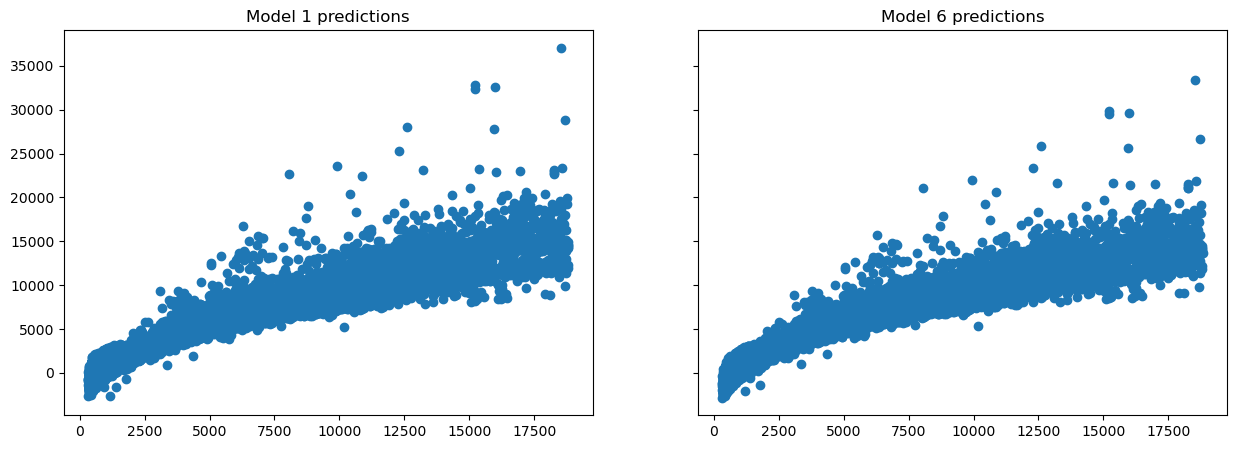

In [93]:
f, (ax1, ax2) =  plt.subplots(nrows=1, ncols=2, figsize=(15,5), sharey=True)

ax1.scatter(df_cubic['price'], model_mlr_1_pred)
ax1.set_title('Model 1 predictions')

ax2.scatter(df_cubic['price'],model_mlr_6_pred)
ax2.set_title('Model 6 predictions')
plt.show()

### Checking the boxplot and the distplot of the residuals

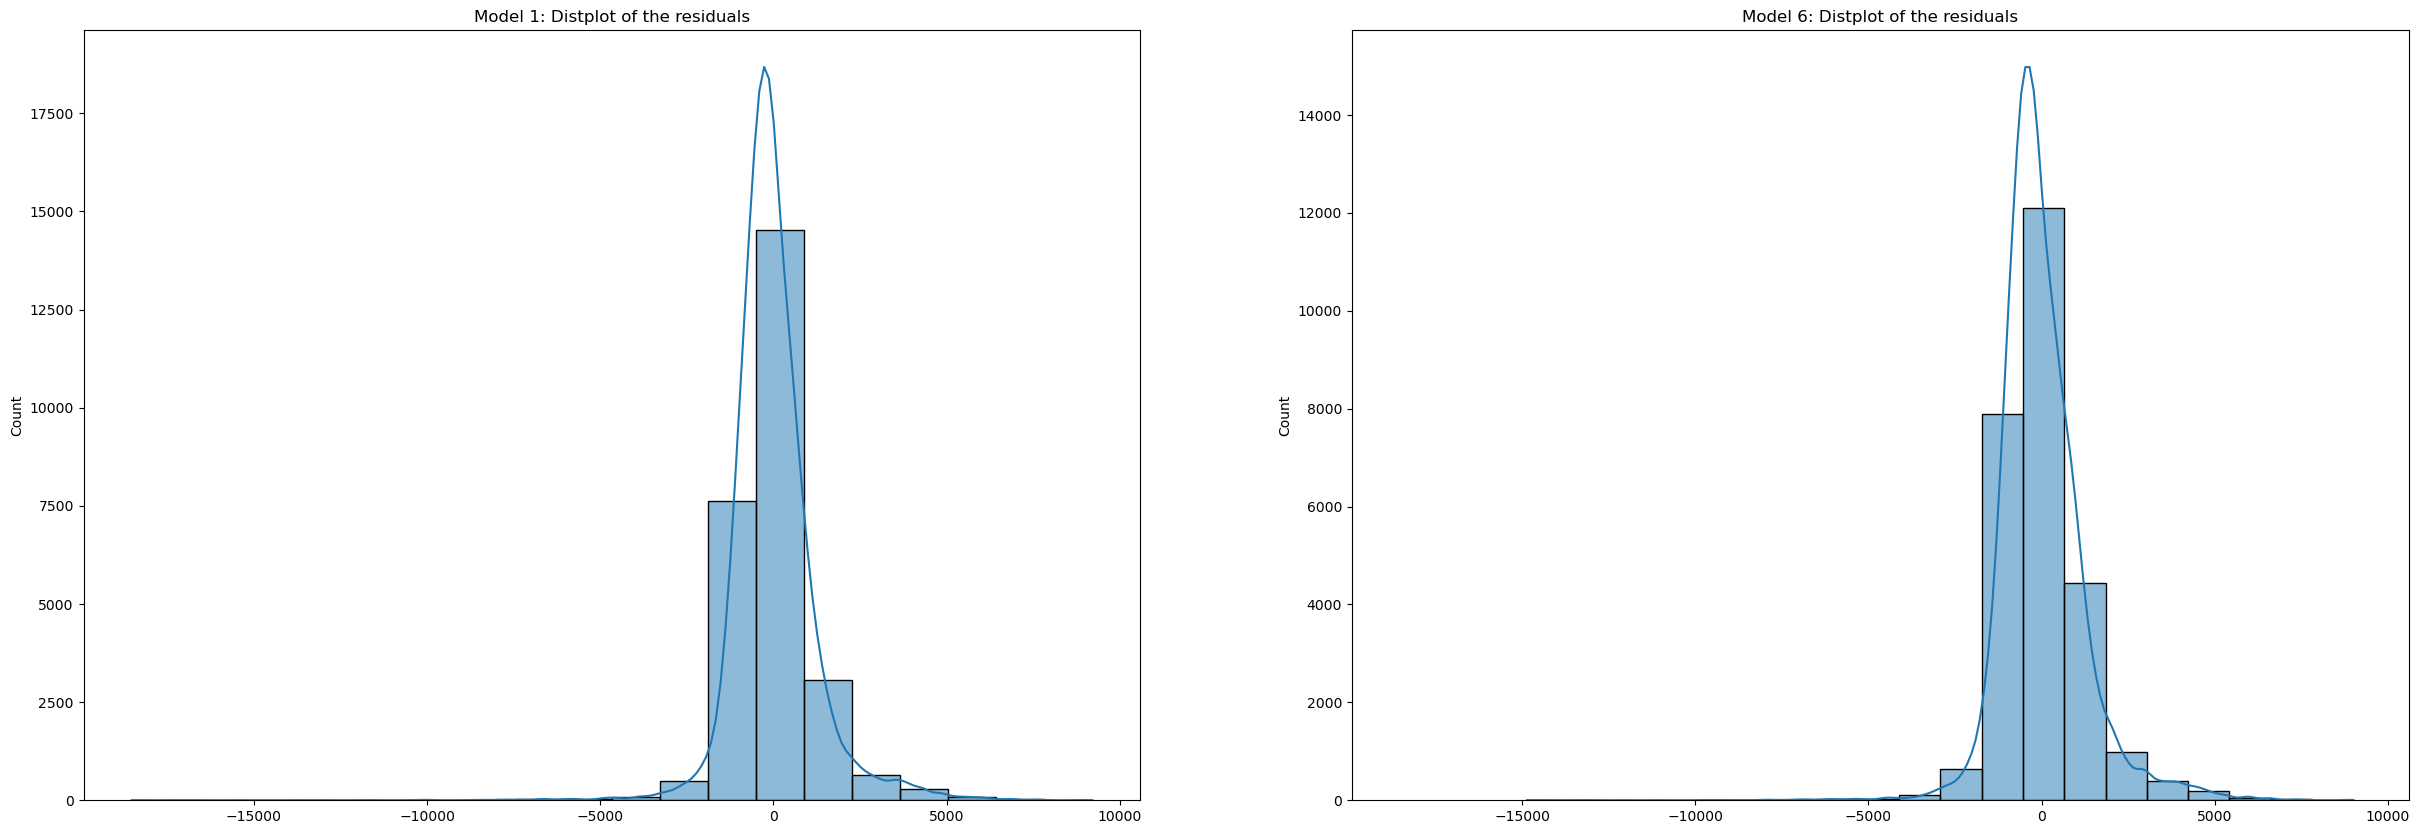

In [94]:
f,a =  plt.subplots(1,2, sharex=True, sharey=False, squeeze=False, figsize=(30,10))

plot_0 = sns.histplot(model_mlr_1.resid, ax=a[0][0], kde=True, bins=20)
a[0][0].set_title('Model 1: Distplot of the residuals')

plot_1 = sns.histplot(model_mlr_6.resid, ax=a[0][1], kde=True, bins=20)
a[0][1].set_title('Model 6: Distplot of the residuals')
plt.show()

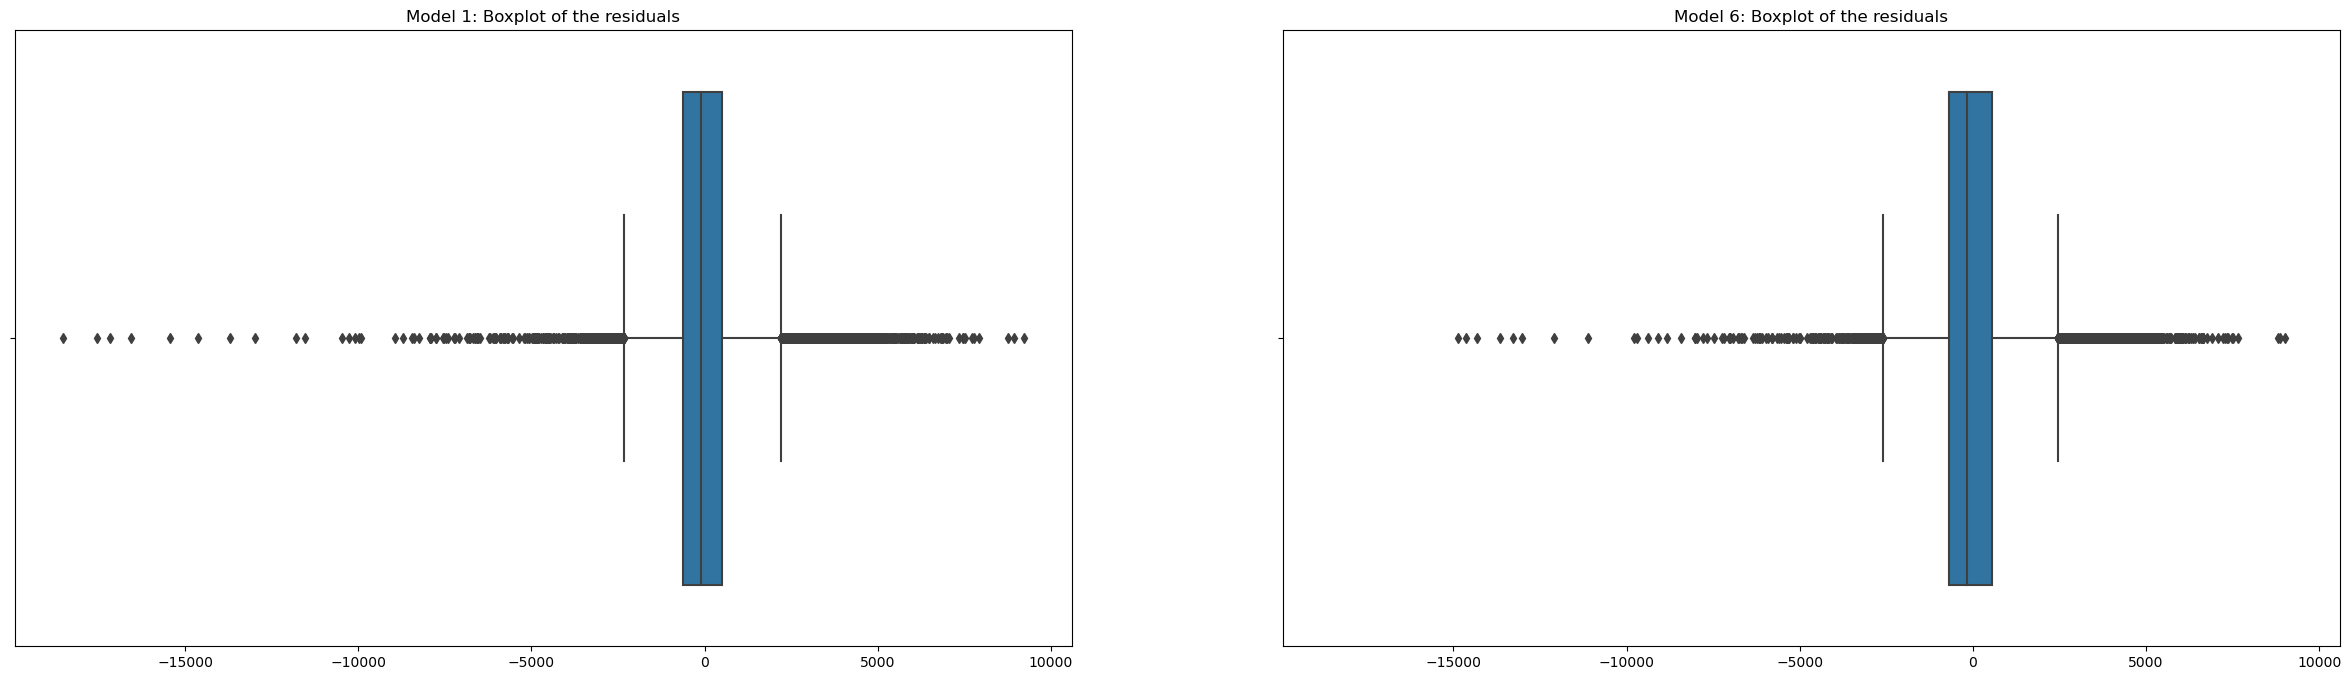

In [95]:
f,a =  plt.subplots(1,2, sharex=True, sharey=False, squeeze=False, figsize=(30,8))

plot_0 = sns.boxplot(x = model_mlr_1.resid, ax=a[0][0])
a[0][0].set_title('Model 1: Boxplot of the residuals')

plot_1 = sns.boxplot(x = model_mlr_6.resid, ax=a[0][1])
a[0][1].set_title('Model 6: Boxplot of the residuals')
plt.show()

## Calculating RMSE (Root mean square error) 

### Model 1 - RMSE:

In [96]:
metrics.mean_squared_error(df_cubic_pp['price'], model_mlr_1_pred, squared=False)

1216.280875799657

### Model 6 - RMSE:

In [97]:
metrics.mean_squared_error(df_cubic_pp['price'], model_mlr_6_pred, squared=False)

1236.9954355893326

- We can conclude that model 6 is the better model with a performance of 90.5% with least number of features(4)
- Out of all the models, linear regression performs the best predicting price of cubic zirconia with an adjusted  𝑅2  of 90.5% and an RMSE of about 1236.99. This indicates that our model can explain about 90.5% of the variation in price 

- The test error of the linear model is low for model 1. However, in model 6, multicollinearity is reduced by using less number of features(4) compared to model 1 which used 9 features to explain the variance in predicted variable.

## Treating outliers

In [98]:
df_cubic_ot = df_cubic_pp.copy()

In [99]:
df_cubic_ot.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779


In [100]:
def outlier_treatment(col):
    Q1,Q3=np.percentile(df_cubic_ot[col],[25,75])
    IQR=Q3-Q1
    Qmin=Q1-1.5*IQR
    Qmax=Q3+1.5*IQR
    df_cubic_ot[col]=np.where(df_cubic_ot[col] < Qmin,Qmin,df_cubic_ot[col])
    df_cubic_ot[col]=np.where(df_cubic_ot[col] > Qmax,Qmax,df_cubic_ot[col])


for col in df_cubic_ot[['carat','depth','table','x','y','z','price']]:
    outlier_treatment(col)

### Box Plots and Distribution Plots after treating outliers

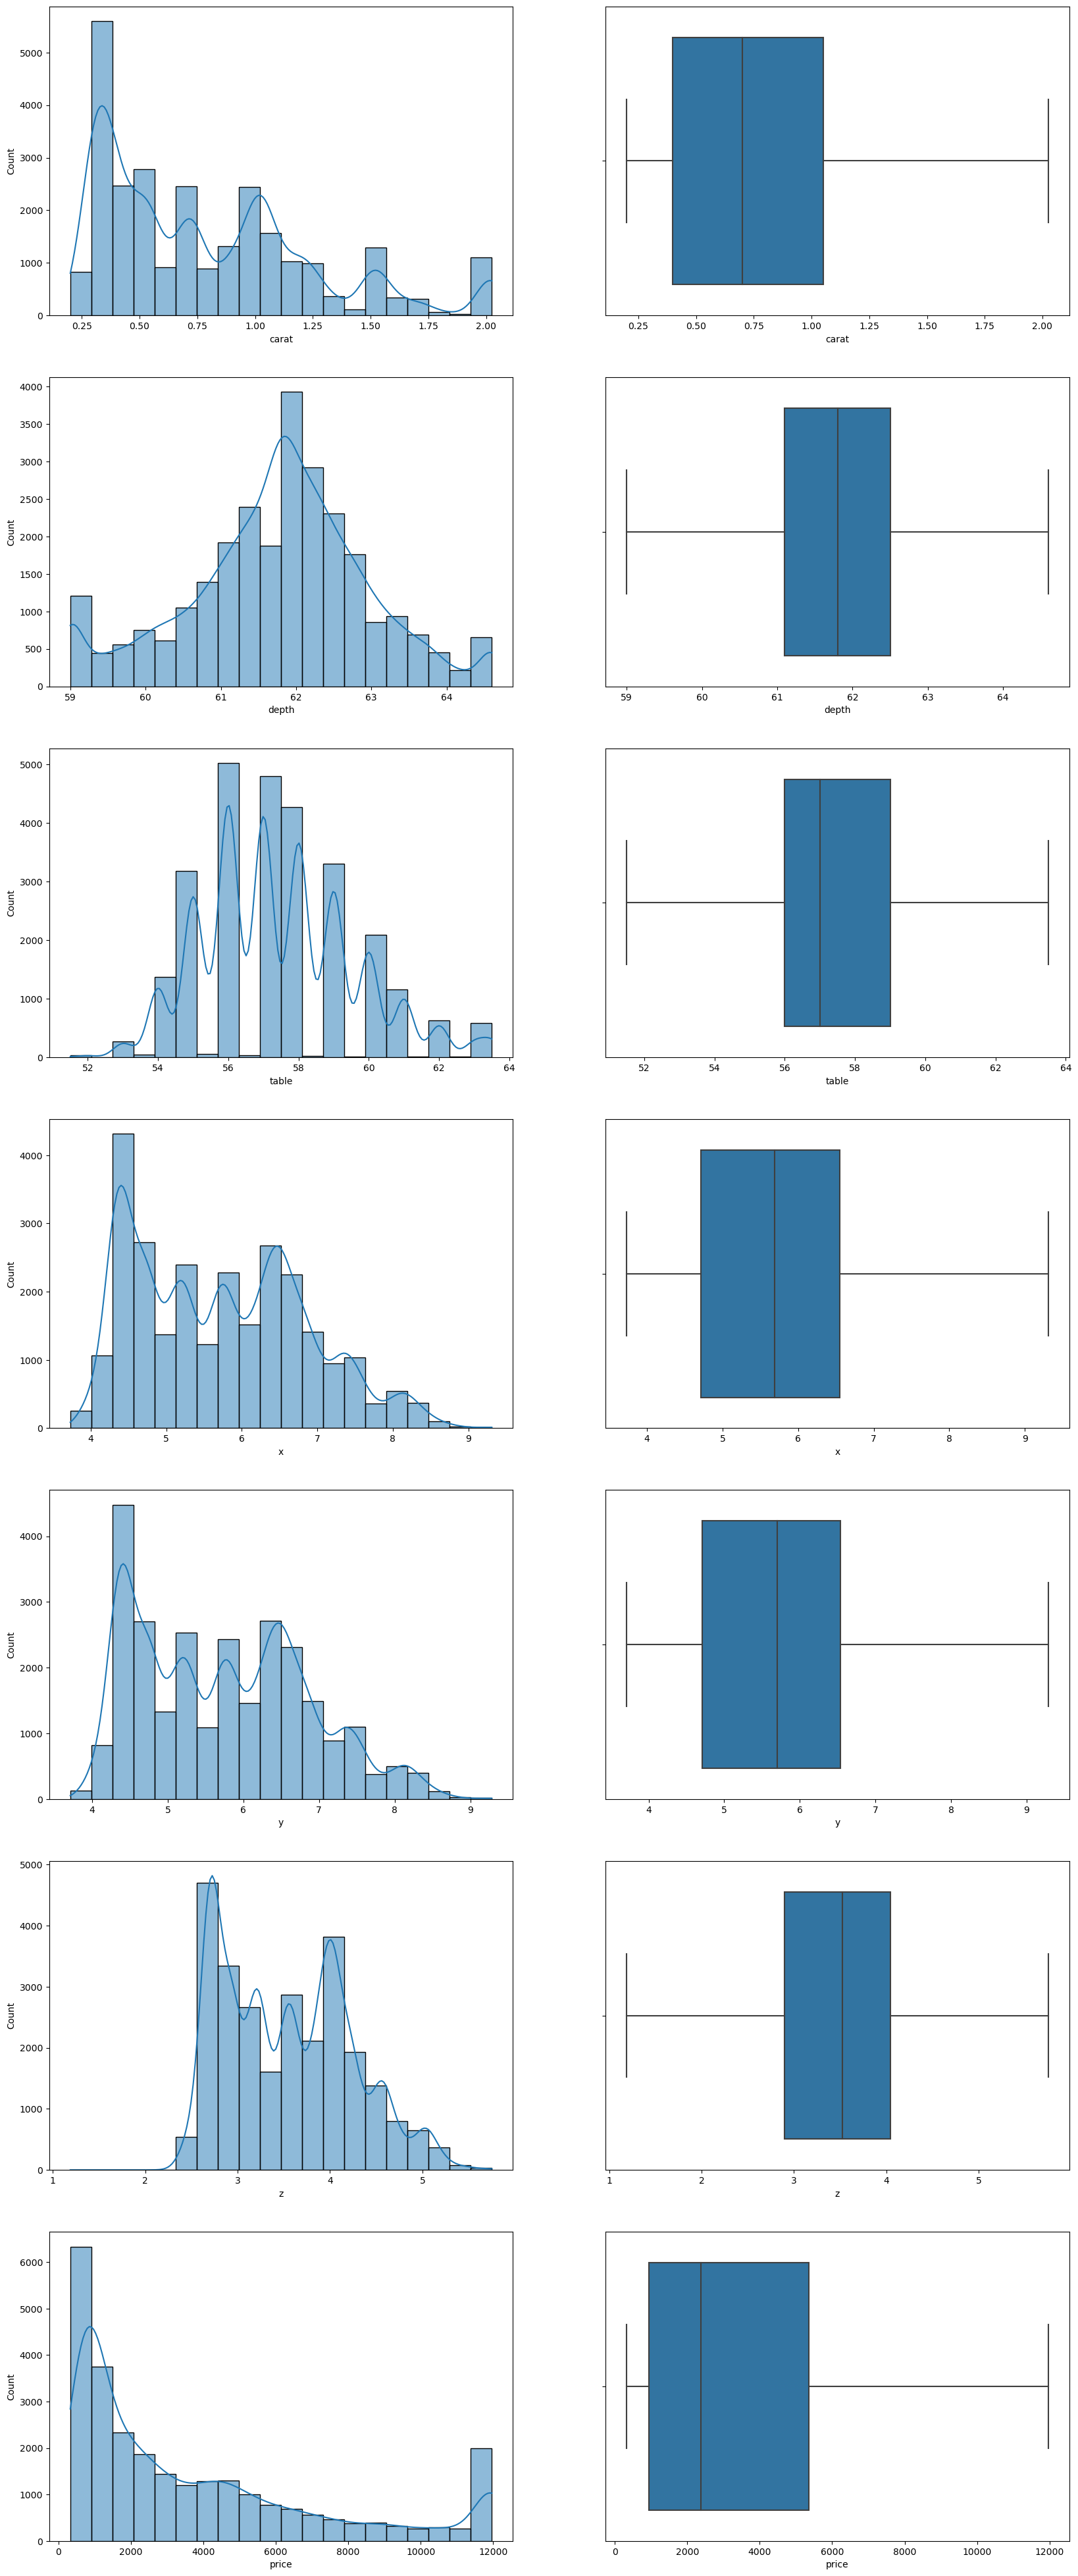

In [101]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(20,50)

sns.histplot(df_cubic_ot['carat'], kde=True, bins=20, ax=axes[0][0])
sns.boxplot(x='carat', data=df_cubic_ot, ax=axes[0][1])

sns.histplot(df_cubic_ot['depth'] , kde=True, bins=20, ax=axes[1][0])
sns.boxplot(x='depth', data=df_cubic_ot , ax=axes[1][1])

sns.histplot(df_cubic_ot['table'], kde=True, bins=20, ax=axes[2][0])
sns.boxplot(x='table', data=df_cubic_ot, ax=axes[2][1])

sns.histplot(df_cubic_ot['x'] , kde=True, bins=20, ax=axes[3][0])
sns.boxplot(x='x', data=df_cubic_ot , ax=axes[3][1])

sns.histplot(df_cubic_ot['y'], kde=True, bins=20, ax=axes[4][0])
sns.boxplot(x='y', data=df_cubic_ot, ax=axes[4][1])

sns.histplot(df_cubic_ot['z'] , kde=True, bins=20, ax=axes[5][0])
sns.boxplot(x='z', data=df_cubic_ot , ax=axes[5][1])

sns.histplot(df_cubic_ot['price'], kde=True, bins=20, ax=axes[6][0])
sns.boxplot(x='price', data=df_cubic_ot, ax=axes[6][1])

plt.show()

## Building all the models after treating outliers

In [102]:
formula_mlr_ot_1 = 'price~carat+cut+color+clarity+depth+table+x+y+z'
model_mlr_ot_1 = SM.ols(formula=formula_mlr_ot_1,data=df_cubic_ot).fit()
model_mlr_ot_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 4.059e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:30:09   Log-Likelihood:            -2.2160e+05
No. Observations:               26925   AIC:                         4.432e+05
Df Residuals:                   26915   BIC:                         4.433e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5896.6528    685.094     -8.607      0.000   -7239.472   -4553.834
carat       8820.4392     68.711    128.370      0.000    8685.762    8955.117
cut          108.9635      6.110     17.835      0.000      96.988     120.939
color        274.1298      3.433     79.843      0.000     267.400     280.859
clarity      435.3710      3.745    116.241      0.000     428.030     442.712
depth         46.7700      9.589      4.878      0.000      27.975      65.565
table        -12.9569      3.265     -3.969      0.000     -19.356      -6.557
x          -1148.1556    100.472    -11.428      0.000   -1345.085    -951.226
y           1502.5768     98.887     15.195      0.000    1308.752    1696.401
z          -1164.4284    121.927     -9.550      0.000   -1403.412    -925.445
==============================================================================
Omnibus:                     3709.178   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14576.194
Skew:                           0.650   Prob(JB):                         0.00
Kurtosis:                       6.362   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
model_vif_carat = SM.ols(formula='carat~cut+color+clarity+depth+table+x+y+z',data=df_cubic_ot).fit()
print('carat VIF = ',round(1/(1-model_vif_carat.rsquared),2))

model_vif_cut = SM.ols(formula='cut~carat+color+clarity+depth+table+x+y+z',data=df_cubic_ot).fit()
print('cut VIF = ',round(1/(1-model_vif_cut.rsquared),2))

model_vif_color = SM.ols(formula='color~carat+cut+clarity+depth+table+x+y+z',data=df_cubic_ot).fit()
print('color VIF = ',round(1/(1-model_vif_color.rsquared),2))

model_vif_clarity = SM.ols(formula='clarity~carat+cut+color+depth+table+x+y+z',data=df_cubic_ot).fit()
print('clarity VIF = ',round(1/(1-model_vif_clarity.rsquared),2))

model_vif_depth = SM.ols(formula='depth~carat+cut+clarity+color+table+x+y+z',data=df_cubic_ot).fit()
print('depth VIF = ',round(1/(1-model_vif_depth.rsquared),2))

model_vif_table = SM.ols(formula='table~carat+cut+clarity+color+depth+x+y+z',data=df_cubic_ot).fit()
print('table VIF = ',round(1/(1-model_vif_table.rsquared),2))

model_vif_x = SM.ols(formula='x~carat+cut+clarity+color+depth+table+y+z',data=df_cubic_ot).fit()
print('x VIF = ',round(1/(1-model_vif_x.rsquared),2))

model_vif_y = SM.ols(formula='y~carat+cut+clarity+color+depth+table+x+z',data=df_cubic_ot).fit()
print('y VIF = ',round(1/(1-model_vif_y.rsquared),2))

model_vif_z = SM.ols(formula='z~carat+cut+clarity+color+depth+table+x+y',data=df_cubic_ot).fit()
print('z VIF = ',round(1/(1-model_vif_z.rsquared),2))

carat VIF =  32.89
cut VIF =  1.51
color VIF =  1.12
clarity VIF =  1.24
depth VIF =  4.45
table VIF =  1.62
x VIF =  417.37
y VIF =  398.58
z VIF =  234.84


In [104]:
ot_model_name = []
ot_model_perf = []
ot_no_of_x_variables = []
ot_x_variables_included = []
ot_model_name.append('model 1')
ot_model_perf.append(model_mlr_ot_1.rsquared_adj)
ot_no_of_x_variables.append(9)
ot_x_variables_included.append('carat,cut,color,clarity,depth,table,x,y,z')

### dropping 'x' variable

In [105]:
formula_mlr_ot_2 = 'price~carat+cut+color+clarity+depth+table+y+z'
model_mlr_ot_2 = SM.ols(formula=formula_mlr_ot_2,data=df_cubic_ot).fit()
model_mlr_ot_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 4.542e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:30:10   Log-Likelihood:            -2.2166e+05
No. Observations:               26925   AIC:                         4.433e+05
Df Residuals:                   26916   BIC:                         4.434e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7635.5520    669.587    -11.403      0.000   -8947.978   -6323.126
carat       8681.1052     67.783    128.071      0.000    8548.246    8813.964
cut          102.6998      6.100     16.837      0.000      90.744     114.655
color        274.3496      3.442     79.717      0.000     267.604     281.095
clarity      440.0698      3.732    117.927      0.000     432.755     447.384
depth         76.6089      9.249      8.283      0.000      58.481      94.737
table        -18.1624      3.241     -5.604      0.000     -24.514     -11.810
y            718.9560     71.421     10.066      0.000     578.966     858.946
z          -1667.0355    113.992    -14.624      0.000   -1890.465   -1443.606
==============================================================================
Omnibus:                     3630.581   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14455.479
Skew:                           0.632   Prob(JB):                         0.00
Kurtosis:                       6.360   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
model_vif_carat = SM.ols(formula='carat~cut+color+clarity+depth+table+y+z',data=df_cubic_ot).fit()
print('carat VIF = ',round(1/(1-model_vif_carat.rsquared),2))

model_vif_cut = SM.ols(formula='cut~carat+color+clarity+depth+table+y+z',data=df_cubic_ot).fit()
print('cut VIF = ',round(1/(1-model_vif_cut.rsquared),2))

model_vif_color = SM.ols(formula='color~carat+cut+clarity+depth+table+y+z',data=df_cubic_ot).fit()
print('color VIF = ',round(1/(1-model_vif_color.rsquared),2))

model_vif_clarity = SM.ols(formula='clarity~carat+cut+color+depth+table+y+z',data=df_cubic_ot).fit()
print('clarity VIF = ',round(1/(1-model_vif_clarity.rsquared),2))

model_vif_depth = SM.ols(formula='depth~carat+cut+clarity+color+table+y+z',data=df_cubic_ot).fit()
print('depth VIF = ',round(1/(1-model_vif_depth.rsquared),2))

model_vif_table = SM.ols(formula='table~carat+cut+clarity+color+depth+y+z',data=df_cubic_ot).fit()
print('table VIF = ',round(1/(1-model_vif_table.rsquared),2))

model_vif_y = SM.ols(formula='y~carat+cut+clarity+color+depth+table+z',data=df_cubic_ot).fit()
print('y VIF = ',round(1/(1-model_vif_y.rsquared),2))

model_vif_z = SM.ols(formula='z~carat+cut+clarity+color+depth+table+y',data=df_cubic_ot).fit()
print('z VIF = ',round(1/(1-model_vif_z.rsquared),2))

carat VIF =  31.86
cut VIF =  1.5
color VIF =  1.12
clarity VIF =  1.23
depth VIF =  4.12
table VIF =  1.59
y VIF =  206.92
z VIF =  204.28


In [107]:
ot_model_name.append('model 2')
ot_model_perf.append(model_mlr_ot_2.rsquared_adj)
ot_no_of_x_variables.append(8)
ot_x_variables_included.append('carat,cut,color,clarity,depth,table,y,z')

### dropping 'y' variable

In [108]:
formula_mlr_ot_3 = 'price~carat+cut+color+clarity+depth+table+z'
model_mlr_ot_3 = SM.ols(formula=formula_mlr_ot_3,data=df_cubic_ot).fit()
model_mlr_ot_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 5.171e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:30:10   Log-Likelihood:            -2.2172e+05
No. Observations:               26925   AIC:                         4.434e+05
Df Residuals:                   26917   BIC:                         4.435e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2646.9711    451.127     -5.867      0.000   -3531.204   -1762.738
carat       8832.9711     66.206    133.416      0.000    8703.203    8962.739
cut          100.3523      6.106     16.434      0.000      88.383     112.321
color        274.7097      3.448     79.677      0.000     267.952     281.467
clarity      439.9880      3.739    117.686      0.000     432.660     447.316
depth          1.3962      5.461      0.256      0.798      -9.308      12.100
table        -19.5621      3.244     -6.031      0.000     -25.920     -13.204
z           -609.2346     44.262    -13.764      0.000    -695.990    -522.479
==============================================================================
Omnibus:                     3616.664   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15091.169
Skew:                           0.615   Prob(JB):                         0.00
Kurtosis:                       6.455   Cond. No.                     6.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
model_vif_carat = SM.ols(formula='carat~cut+color+clarity+depth+table+z',data=df_cubic_ot).fit()
print('carat VIF = ',round(1/(1-model_vif_carat.rsquared),2))

model_vif_cut = SM.ols(formula='cut~carat+color+clarity+depth+table+z',data=df_cubic_ot).fit()
print('cut VIF = ',round(1/(1-model_vif_cut.rsquared),2))

model_vif_color = SM.ols(formula='color~carat+cut+clarity+depth+table+z',data=df_cubic_ot).fit()
print('color VIF = ',round(1/(1-model_vif_color.rsquared),2))

model_vif_clarity = SM.ols(formula='clarity~carat+cut+color+depth+table+z',data=df_cubic_ot).fit()
print('clarity VIF = ',round(1/(1-model_vif_clarity.rsquared),2))

model_vif_depth = SM.ols(formula='depth~carat+cut+clarity+color+table+z',data=df_cubic_ot).fit()
print('depth VIF = ',round(1/(1-model_vif_depth.rsquared),2))

model_vif_table = SM.ols(formula='table~carat+cut+clarity+color+depth+z',data=df_cubic_ot).fit()
print('table VIF = ',round(1/(1-model_vif_table.rsquared),2))

model_vif_z = SM.ols(formula='z~carat+cut+clarity+color+depth+table',data=df_cubic_ot).fit()
print('z VIF = ',round(1/(1-model_vif_z.rsquared),2))

carat VIF =  30.28
cut VIF =  1.5
color VIF =  1.12
clarity VIF =  1.23
depth VIF =  1.43
table VIF =  1.58
z VIF =  30.68


In [110]:
ot_model_name.append('model 3')
ot_model_perf.append(model_mlr_ot_3.rsquared_adj)
ot_no_of_x_variables.append(7)
ot_x_variables_included.append('carat,cut,color,clarity,depth,table,z')

### dropping 'z' variable

In [111]:
formula_mlr_ot_4 = 'price~carat+cut+color+clarity+depth+table'
model_mlr_ot_4 = SM.ols(formula=formula_mlr_ot_4,data=df_cubic_ot).fit()
model_mlr_ot_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 5.987e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:30:11   Log-Likelihood:            -2.2181e+05
No. Observations:               26925   AIC:                         4.436e+05
Df Residuals:                   26918   BIC:                         4.437e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2963.7997    452.114     -6.555      0.000   -3849.967   -2077.633
carat       7941.5062     13.780    576.307      0.000    7914.497    7968.516
cut          102.6474      6.126     16.757      0.000      90.641     114.654
color        272.8864      3.457     78.931      0.000     266.110     279.663
clarity      447.7847      3.708    120.748      0.000     440.516     455.053
depth        -19.3870      5.266     -3.681      0.000     -29.710      -9.065
table        -17.3386      3.251     -5.333      0.000     -23.711     -10.966
==============================================================================
Omnibus:                     3361.416   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11736.857
Skew:                           0.620   Prob(JB):                         0.00
Kurtosis:                       5.987   Cond. No.                     6.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
model_vif_carat = SM.ols(formula='carat~cut+color+clarity+depth+table',data=df_cubic_ot).fit()
print('carat VIF = ',round(1/(1-model_vif_carat.rsquared),2))

model_vif_cut = SM.ols(formula='cut~carat+color+clarity+depth+table',data=df_cubic_ot).fit()
print('cut VIF = ',round(1/(1-model_vif_cut.rsquared),2))

model_vif_color = SM.ols(formula='color~carat+cut+clarity+depth+table',data=df_cubic_ot).fit()
print('color VIF = ',round(1/(1-model_vif_color.rsquared),2))

model_vif_clarity = SM.ols(formula='clarity~carat+cut+color+depth+table',data=df_cubic_ot).fit()
print('clarity VIF = ',round(1/(1-model_vif_clarity.rsquared),2))

model_vif_depth = SM.ols(formula='depth~carat+cut+clarity+color+table',data=df_cubic_ot).fit()
print('depth VIF = ',round(1/(1-model_vif_depth.rsquared),2))

model_vif_table = SM.ols(formula='table~carat+cut+clarity+color+depth',data=df_cubic_ot).fit()
print('table VIF = ',round(1/(1-model_vif_table.rsquared),2))


carat VIF =  1.3
cut VIF =  1.49
color VIF =  1.12
clarity VIF =  1.2
depth VIF =  1.32
table VIF =  1.58


In [113]:
ot_model_name.append('model 4')
ot_model_perf.append(model_mlr_ot_4.rsquared_adj)
ot_no_of_x_variables.append(6)
ot_x_variables_included.append('carat,cut,color,clarity,depth,table')

### dropping 'depth' and 'table' variables to check if performance changes with less no. of variables

In [114]:
formula_mlr_ot_5 = 'price~carat+cut+color+clarity'
model_mlr_ot_5 = SM.ols(formula=formula_mlr_ot_5,data=df_cubic_ot).fit()
model_mlr_ot_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 8.971e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:30:11   Log-Likelihood:            -2.2183e+05
No. Observations:               26925   AIC:                         4.437e+05
Df Residuals:                   26920   BIC:                         4.437e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5209.8081     28.603   -182.140      0.000   -5265.872   -5153.744
carat       7933.3529     13.684    579.749      0.000    7906.531    7960.174
cut          121.2053      5.118     23.681      0.000     111.173     131.237
color        273.1859      3.454     79.092      0.000     266.416     279.956
clarity      449.2426      3.700    121.406      0.000     441.990     456.495
==============================================================================
Omnibus:                     3370.319   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11672.915
Skew:                           0.624   Prob(JB):                         0.00
Kurtosis:                       5.974   Cond. No.                         31.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
ot_model_name.append('model 5')
ot_model_perf.append(model_mlr_ot_5.rsquared_adj)
ot_no_of_x_variables.append(4)
ot_x_variables_included.append('carat,cut,color,clarity')

In [116]:
df_ot_model_performance = pd.DataFrame(ot_model_name,columns=['model_name'])
df_ot_model_performance['adj_R_squared'] = pd.DataFrame(ot_model_perf)
df_ot_model_performance['no_of_x_variables'] = pd.DataFrame(ot_no_of_x_variables)
df_ot_model_performance['x_variables_included'] = pd.DataFrame(ot_x_variables_included)

In [117]:
df_ot_model_performance

,model_name,adj_R_squared,no_of_x_variables,x_variables_included
0,model 1,0.931350,9,"carat,cut,color,clarity,depth,table,x,y,z"
1,model 2,0.931020,8,"carat,cut,color,clarity,depth,table,y,z"
2,model 3,0.930763,7,"carat,cut,color,clarity,depth,table,z"
3,model 4,0.930278,6,"carat,cut,color,clarity,depth,table"
4,model 5,0.930204,4,"carat,cut,color,clarity"


Inferences on models built after treating outliers:

- Model 5 has an adjusted R-square value of 93% which is similar to all the models from 1 to 4
- There is no change in performance even after treating multicollinearity
- 93% of variance is explained by the factors considered above(carat,cut,color and clarity) on the target variable, whereas before treating outliers, 90.5% of variance is explained
- The outcome of the regression model is better after treating outliers with a variance of 93%, however the values are not unrealistic. Hence, we can choose the model we built without treating outliers with a variance of 90.5%

## Predictive approach

In [118]:
lr = LinearRegression()

In [119]:
df_cubic_pp.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779


- Splitting the data into the dependent and independent variables.

In [120]:
X = df_cubic_pp.drop('price', axis=1)
Y = df_cubic_pp['price']

- Splitting the data into train (70%) and test (30%).

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [122]:
lr.fit(X_train,Y_train)

LinearRegression()

In [123]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[idx]))

The coefficient for carat is 11054.457219364136
The coefficient for cut is 107.3887926665351
The coefficient for color is 329.6026406281934
The coefficient for clarity is 502.9591100351053
The coefficient for depth is -84.34477277815833
The coefficient for table is -35.57555822491017
The coefficient for x is -951.975419286857
The coefficient for y is 6.672990548429425
The coefficient for z is -42.13557708600473


In [124]:
# Let us check the intercept for the model

intercept = lr.intercept_

print("The intercept for our model is :",format(intercept))

The intercept for our model is : 4966.08268105781


In [125]:
lr.score(X_train, Y_train)

0.9079853166461039

In [126]:
lr.score(X_test, Y_test)

0.90961736882177

In [127]:
data_train = pd.concat([X_train, Y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1.0,5.0,1.0,63.3,56.0,6.53,6.58,4.15,4065
12108,1.01,2.0,6.0,1.0,64.0,56.0,6.30,6.38,4.06,5166
20181,0.67,1.0,1.0,3.0,60.7,61.4,5.60,5.64,3.41,1708
4712,0.76,1.0,3.0,2.0,57.7,63.0,6.05,5.97,3.47,2447
2548,1.01,3.0,3.0,4.0,62.8,59.0,6.37,6.34,3.99,6618


In [128]:
model_train = SM.ols(formula= 'price~carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()


In [129]:
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.065e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:30:11   Log-Likelihood:            -1.6062e+05
No. Observations:               18847   AIC:                         3.213e+05
Df Residuals:                   18837   BIC:                         3.213e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4966.0827    717.308      6.923      0.000    3560.094    6372.072
carat       1.105e+04     93.361    118.406      0.000    1.09e+04    1.12e+04
cut          107.3888      9.738     11.027      0.000      88.301     126.477
color        329.6026      5.507     59.853      0.000     318.809     340.397
clarity      502.9591      5.957     84.431      0.000     491.283     514.635
depth        -84.3448      7.863    -10.727      0.000     -99.757     -68.933
table        -35.5756      5.011     -7.100      0.000     -45.397     -25.754
x           -951.9754     50.868    -18.715      0.000   -1051.681    -852.270
y              6.6730     23.895      0.279      0.780     -40.164      53.510
z            -42.1356     41.730     -1.010      0.313    -123.929      39.658
==============================================================================
Omnibus:                     4196.806   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           205178.221
Skew:                          -0.059   Prob(JB):                         0.00
Kurtosis:                      19.164   Cond. No.                     6.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
data_test = pd.concat([X_test, Y_test], axis=1)
data_test.shape

(8078, 10)

In [131]:
model_test = SM.ols(formula= 'price~carat+cut+color+clarity+depth+table+x+y+z', data = data_test).fit()


In [132]:
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     9172.
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:30:11   Log-Likelihood:                -68794.
No. Observations:                8078   AIC:                         1.376e+05
Df Residuals:                    8068   BIC:                         1.377e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7961.8831   1779.493     -4.474      0.000   -1.15e+04   -4473.617
carat       1.102e+04    139.740     78.866      0.000    1.07e+04    1.13e+04
cut          145.0145     14.791      9.804      0.000     116.020     174.009
color        325.2370      8.319     39.094      0.000     308.929     341.545
clarity      486.2829      9.112     53.368      0.000     468.421     504.145
depth         99.9556     26.035      3.839      0.000      48.920     150.991
table         -9.9008      7.687     -1.288      0.198     -24.970       5.168
x          -1351.1237    211.755     -6.381      0.000   -1766.218    -936.029
y           2268.3609    221.033     10.263      0.000    1835.080    2701.642
z          -3042.5716    392.800     -7.746      0.000   -3812.561   -2272.582
==============================================================================
Omnibus:                     1779.903   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            74432.773
Skew:                          -0.184   Prob(JB):                         0.00
Kurtosis:                      17.866   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- #### Adjusted R square value for both train and test dataset are similar i.e 90.8% and 91.1% of variance is explained in training and test data respectively
- #### As the adj R square value is high for test data, predictions can be accurate in production

In [133]:
df_model_performance

,model_name,adj_R_squared,no_of_x_variables,x_variables_included
0,simple linear regression,0.850817,1,carat
1,simple linear regression scaled,0.850817,1,carat(scaled)
2,model_1_all,0.908470,9,"carat,cut,color,clarity,depth,table,x,y,z"
3,model_2_drop_x,0.906974,8,"carat,cut,color,clarity,depth,table,y,z"
4,model_3_drop_z,0.906395,7,"carat,cut,color,clarity,depth,table,y"
5,model_4_drop_y,0.905574,6,"carat,cut,color,clarity,depth,table"
6,model_5_drop_table,0.905416,5,"carat,cut,color,clarity,depth"
7,model_6_drop_depth,0.905343,4,"carat,cut,color,clarity"


### Using only Model 1 variables to build the model on the training data and predict on the training as well as test data.

In [134]:
model_1 = lr.fit(X_train[['carat','cut','color','clarity','depth','table','x','y','z']], Y_train)


In [135]:
model_1_pred_train = model_1.predict(X_train[['carat','cut','color','clarity','depth','table','x','y','z']])

In [136]:
model_1_pred_test = model_1.predict(X_test[['carat','cut','color','clarity','depth','table','x','y','z']])

### Using only Model 6 variables to build the model on the training data and predict on the training as well as test data.

In [137]:
model_6 = lr.fit(X_train[['carat','cut','color','clarity']], Y_train)


In [138]:
model_6_pred_train = model_6.predict(X_train[['carat','cut','color','clarity']])

In [139]:
model_6_pred_test = model_6.predict(X_test[['carat','cut','color','clarity']])

## RMSE check for the models built

In [140]:
print('Training Data RMSE of model_1:',metrics.mean_squared_error(Y_train,model_1_pred_train,squared=False))
print('Test Data RMSE of model_1:',metrics.mean_squared_error(Y_test,model_1_pred_test,squared=False))

Training Data RMSE of model_1: 1215.8035529418505
Test Data RMSE of model_1: 1217.7789841914318


In [141]:
print('Training Data RMSE of model_6:',metrics.mean_squared_error(Y_train,model_6_pred_train,squared=False))
print('Test Data RMSE of model_6:',metrics.mean_squared_error(Y_test,model_6_pred_test,squared=False))

Training Data RMSE of model_6: 1236.8326134303509
Test Data RMSE of model_6: 1237.4497650968


- RMSE value is higher for test data in both model 1 and 6
- If rmse is high on test data, we can say that model is performing well on training data but not so good on unseen data
- In our case, rmse for test data is only little bit high than training data. Hence, we cannot state model will not perform well in production
- The error between yactual and ypredict must be as low as possible even on test data
- RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.
- RMSE for model 1(1217) is lower compared to model 6(1237). We predicted model 6 as the better model in descriptive approach. However, as accuracy is important in predictive approach not the number of variables used, we can consider model 1 as the better possible model for predictions

## Scatterplot for the predictions

### Training Data


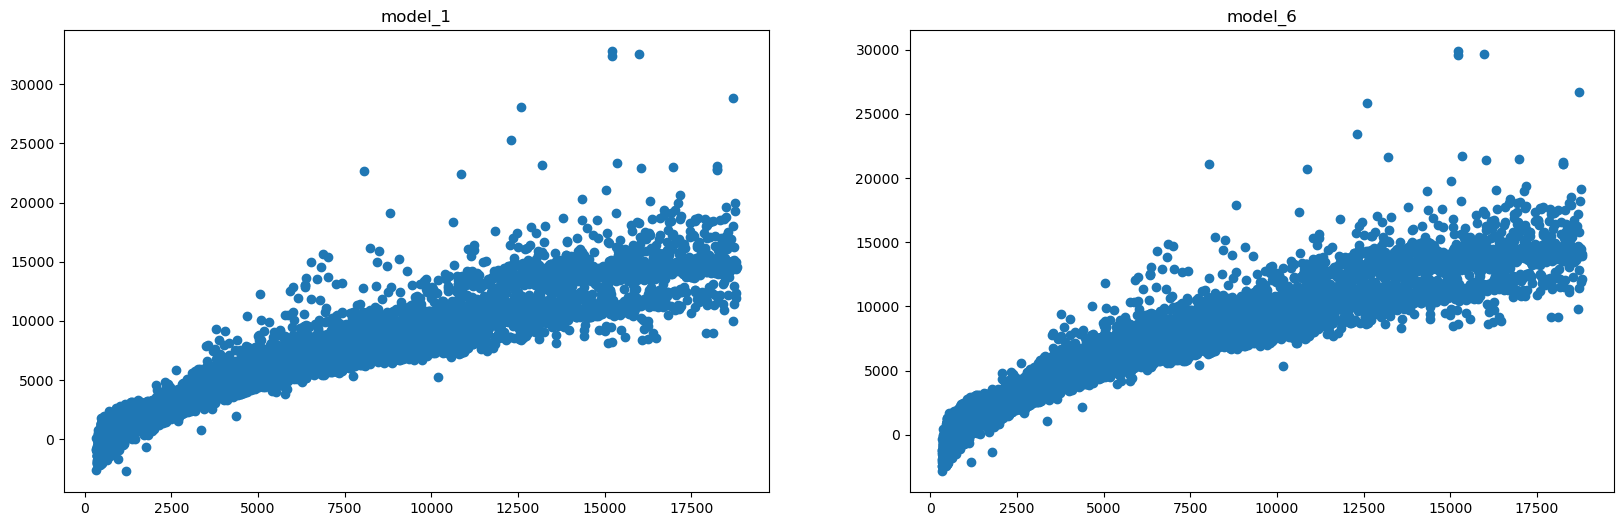

In [142]:
f,a =  plt.subplots(1,2, sharex=True, sharey=False, squeeze=False, figsize=(20,6))

a[0][0].scatter(Y_train,model_1_pred_train)
a[0][0].set_title('model_1')
a[0][1].scatter(Y_train,model_6_pred_train)
a[0][1].set_title('model_6')

plt.show()

### Test Data

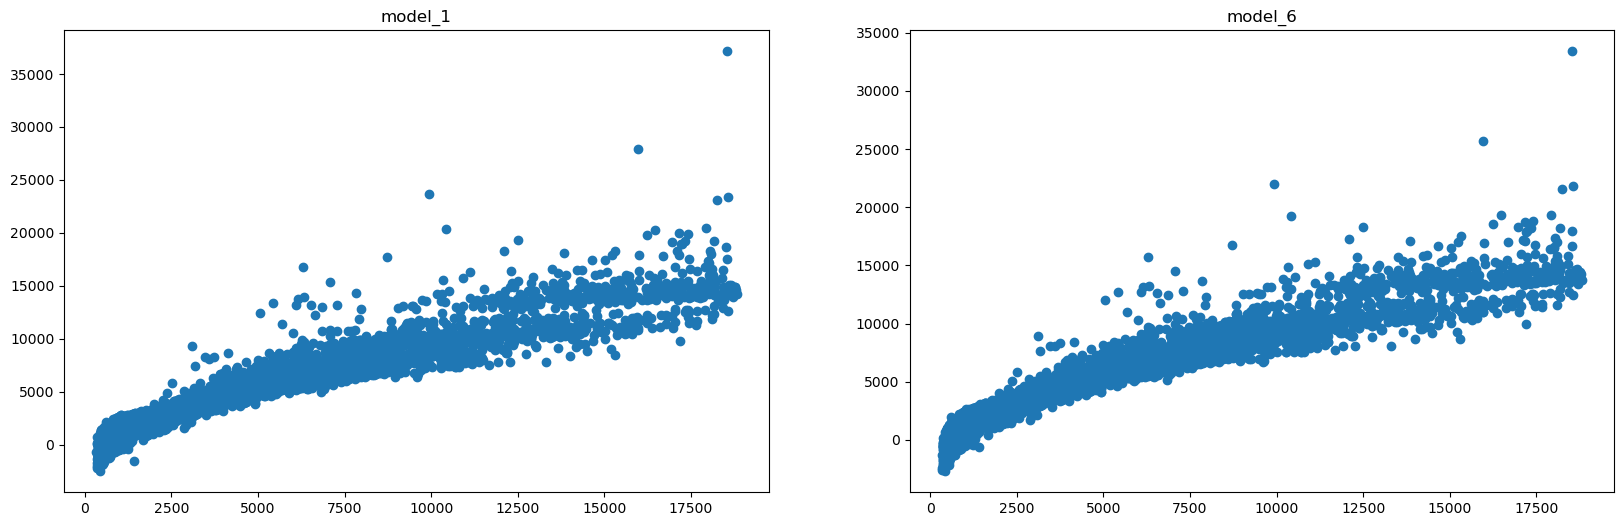

In [143]:
f,a =  plt.subplots(1,2, sharex=True, sharey=False, squeeze=False, figsize=(20,6))

a[0][0].scatter(Y_test,model_1_pred_test)
a[0][0].set_title('model_1')
a[0][1].scatter(Y_test,model_6_pred_test)
a[0][1].set_title('model_6')

plt.show()

- ### From the scatterplot, we can observe that there is more linear relationship between actual y and predicted y when compared to the model 1
- ### Visually both looks like same pattern, but the datapoints are a bit closely arranged in model 6 when compared to model 1

# Problem 2: Logistic Regression

### You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

## The data dictionary is given below:

1. Holiday_Package: Opted for Holiday Package yes/no?


2. Salary: Employee salary


3. Age: Age in years


4. Edu: Years of formal education


5. no_young_children: The number of young children (younger than 7 years)


6. no_older_children: Number of older children


7. foreign: foreigner Yes/No




Following is a guideline for developing a solution:

1. The very first step of any data analysis assignment is to do the exploratory data analysis (EDA). Once you have understood the nature of all the variables, especially identified the response and the predictors, apply appropriate methods to determine whether there is any duplicate observation or missing data and whether the variables have a symmetric or skewed distribution. Note that data may contain various types of attributes and numerical and/or visual data summarization techniques need to be appropriately decided. Both univariate and bivariate analyses and pre-processing of data are important. Check for outliers and comment on removing or keeping them while model building. For this is a classification problem, the dependence of the response on the predictors needs to be investigated.


2. Use the Pre-processed Full Data to develop a logistic regression model to identify significant predictors. Check whether the proposed model is free of multicollinearity. Apply variable selection method as required. Show all intermediate models leading to the final model. Justify your choice of the final model. Which are the significant predictors? Compare values of model selection criteria for proposed models. Compare as many criteria as you feel are suitable.


3. Alternatively, if prediction accuracy of the full scholarship is the only objective, then you may want to divide the data into a training and a test set, chosen randomly, and use the training set to develop a model and test set to validate your model. Use the models developed in Part (2) to compare accuracy in training and test sets. Compare the final model of Part (2) and the proposed one in Part (3). Which model provides the most accurate prediction? If the model found in Part (2) is different from the proposed model in Part (3), give an explanation.

## Loading dataset

- Loading the holiday package dataset as a dataframe into df_holiday

In [144]:
df_holiday = pd.read_csv('holiday_package.csv')

## Checking first 5 rows

- First five rows of the dataset:

In [145]:
df_holiday.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


## Checking last 5 rows

- Last five rows of the dataset:

In [146]:
df_holiday.tail()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [147]:
df_holiday.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

## Dropping Unnamed: 0 column

- Dropping Unnamed: 0 column as it is index and we don't have any use in building models

In [148]:
df_holiday = df_holiday.drop('Unnamed: 0', axis=1)

In [149]:
df_holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


## Checking the dimensions of the dataset

In [150]:
df_holiday.shape

(872, 7)

In [151]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


## Checking for missing values

In [152]:
df_holiday.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [153]:
dup = df_holiday.duplicated().sum()
dup

0


- Inferences: 


- The dataset has a total of five independent variables - All are continuous, two categorical variables one of which is target variable
- Shape (dimension) of the Dataset is (872, 7)
- There are zero NULL values present in the dataset
- No duplicate values present in the dataset
- There are a total of 7 variables and 872 records


## Univariate Analysis

### Summary statistics of the datset

- To perform Univariate analysis on continuous variables, let us start with looking at the summary statistics of the dataset.   

In [154]:
df_holiday.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


### Box Plots and Distribution Plots

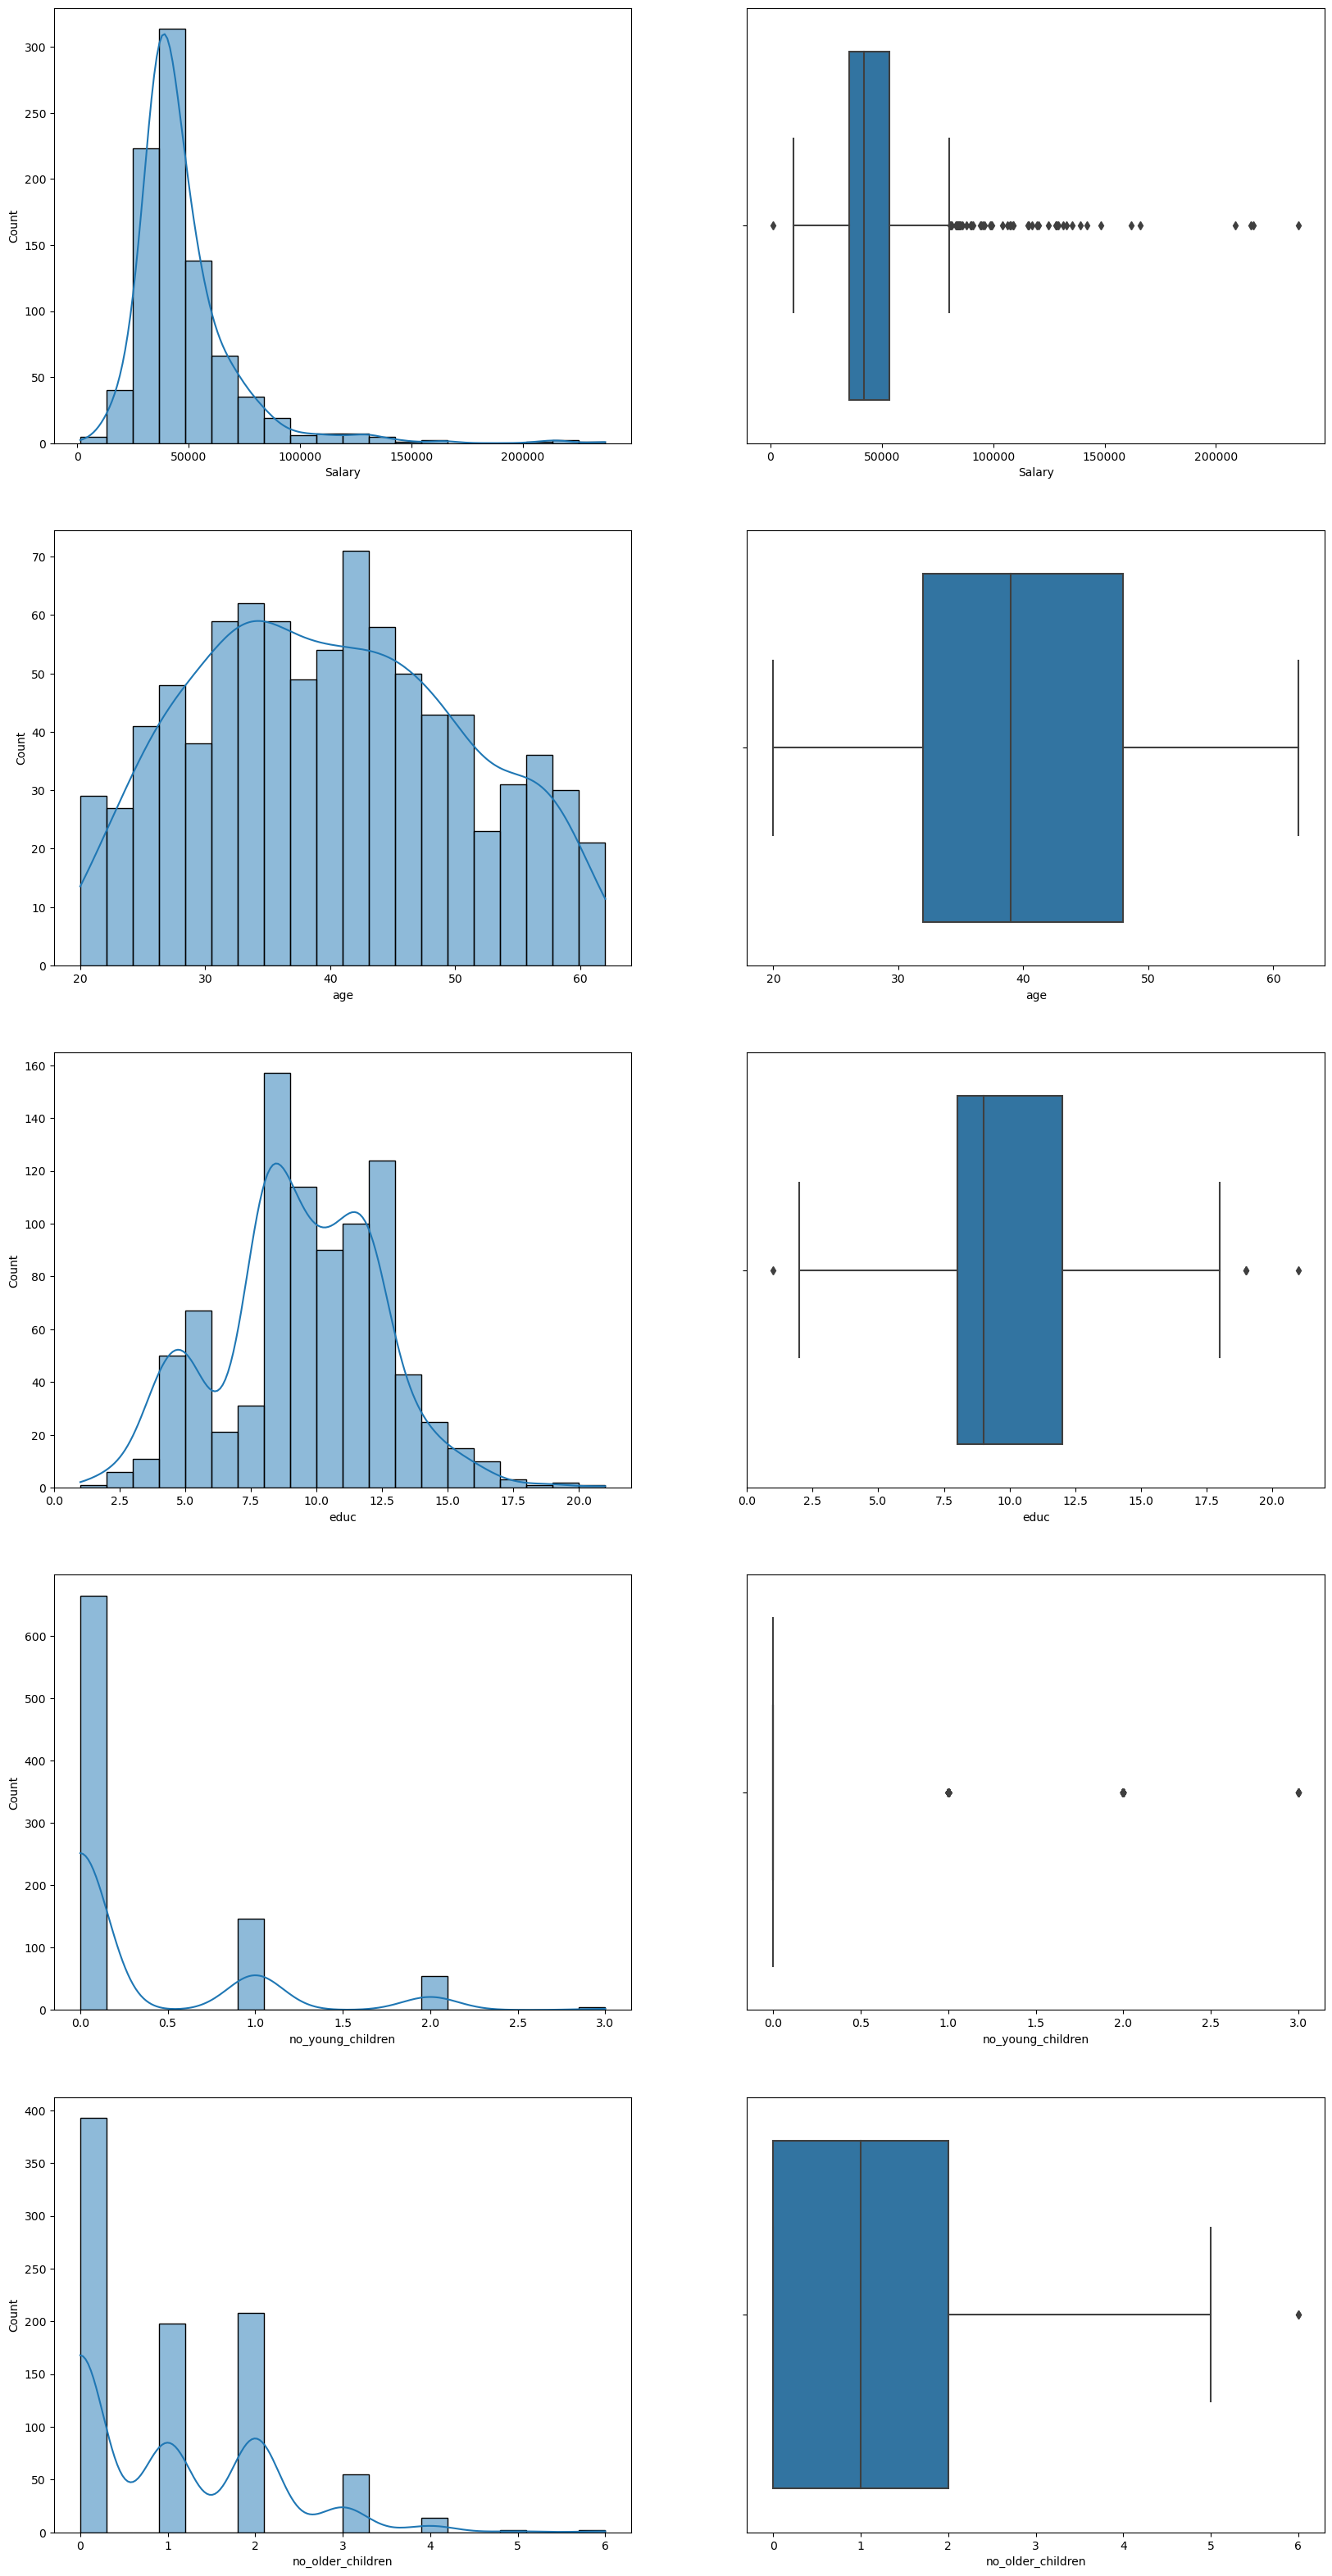

In [155]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20,40)

sns.histplot(df_holiday['Salary'], kde=True, bins=20, ax=axes[0][0])
sns.boxplot(x='Salary', data=df_holiday, ax=axes[0][1])

sns.histplot(df_holiday['age'] , kde=True, bins=20, ax=axes[1][0])
sns.boxplot(x='age', data=df_holiday , ax=axes[1][1])

sns.histplot(df_holiday['educ'], kde=True, bins=20, ax=axes[2][0])
sns.boxplot(x='educ', data=df_holiday, ax=axes[2][1])

sns.histplot(df_holiday['no_young_children'] , kde=True, bins=20, ax=axes[3][0])
sns.boxplot(x='no_young_children', data=df_holiday , ax=axes[3][1])

sns.histplot(df_holiday['no_older_children'], kde=True, bins=20, ax=axes[4][0])
sns.boxplot(x='no_older_children', data=df_holiday, ax=axes[4][1])


plt.show()

### Checking Outlier % of the dataset

In [156]:
Q1 = df_holiday.quantile(0.25)
Q3 = df_holiday.quantile(0.75)
IQR = Q3 - Q1

In [157]:
IQR

Salary               18145.5
age                     16.0
educ                     4.0
no_young_children        0.0
no_older_children        2.0
dtype: float64

In [158]:
Q1-(1.5*IQR)

Salary               8105.75
age                     8.00
educ                    2.00
no_young_children       0.00
no_older_children      -3.00
dtype: float64

In [159]:
Q3+(1.5*IQR)

Salary               80687.75
age                     72.00
educ                    18.00
no_young_children        0.00
no_older_children        5.00
dtype: float64

In [160]:
pd.DataFrame(((df_holiday<(Q1-1.5*IQR))|(df_holiday>(Q3+1.5*IQR))).sum()/df_holiday.shape[0]*100, 
              columns = ["Outlier%"],index=None)

,Outlier%
Holliday_Package,0.000000
Salary,6.536697
age,0.000000
educ,0.458716
foreign,0.000000
no_older_children,0.229358
no_young_children,23.738532


- Three  columns  have  outlier  values with a Percentage of 6.53,0.45,0.22 which is not very high as 20% 
- One column named 'no_young_children' has a very high outlier percentage of 23.73%
- Logistic Regression models are not much impacted due to the presence of outliers because the sigmoid function tapers the outliers. But the presence of extreme outliers may somehow affect the performance of the model and lowering the performance
- Hence, we are not considering treating outliers. If we treat outliers for variable no_young_children, we will loose the only data we have as it is clear from the above box plot

### Checking skewness in the dataset

In [161]:
pd.DataFrame(df_holiday.skew(), columns = ['Skewness'])

,Skewness
Salary,3.103216
age,0.146412
educ,-0.045501
no_young_children,1.946515
no_older_children,0.953951


### Checking Kurtosis values

In [162]:
pd.DataFrame(df_holiday.kurtosis(), columns = ['Kurtosis'])

,Kurtosis
Salary,15.852557
age,-0.909962
educ,0.005558
no_young_children,3.109892
no_older_children,0.676017


Inferences on the Univariate analysis:

- From the Box plots, we can conclude that there are few outliers present in educ,no_young_children and no_older_children variables. 
- There are huge outliers for salary variables but they are realistic values
- Kurtosis value for 2 variables is high, not near to normal distribution
- There is extreme positive kurtosis seen in few variables which is > 3 which means more of the values are located in the tails of the distribution rather than around the mean i.e., salary variable


## Multi-Variate Analysis

- Analyzing the relationship among continuous variables by using Pair plot and Correlation Heatmap.

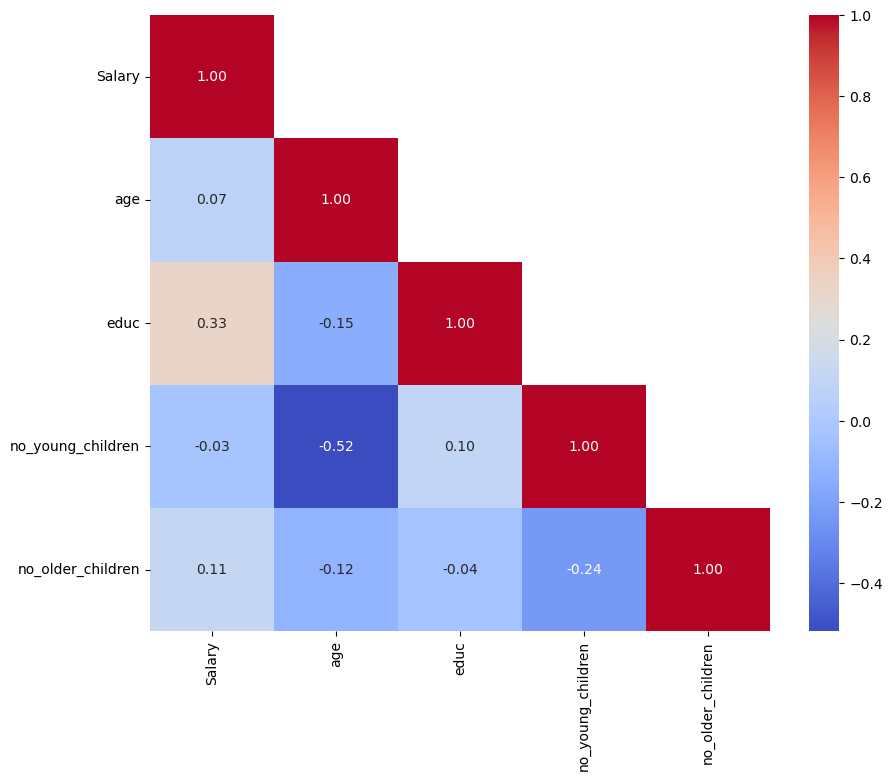

In [163]:
plt.figure(figsize=(10,8))
sns.heatmap(df_holiday.corr(),annot=True,fmt=".2f",mask=np.triu(df_holiday.corr(),1), cmap = 'coolwarm');

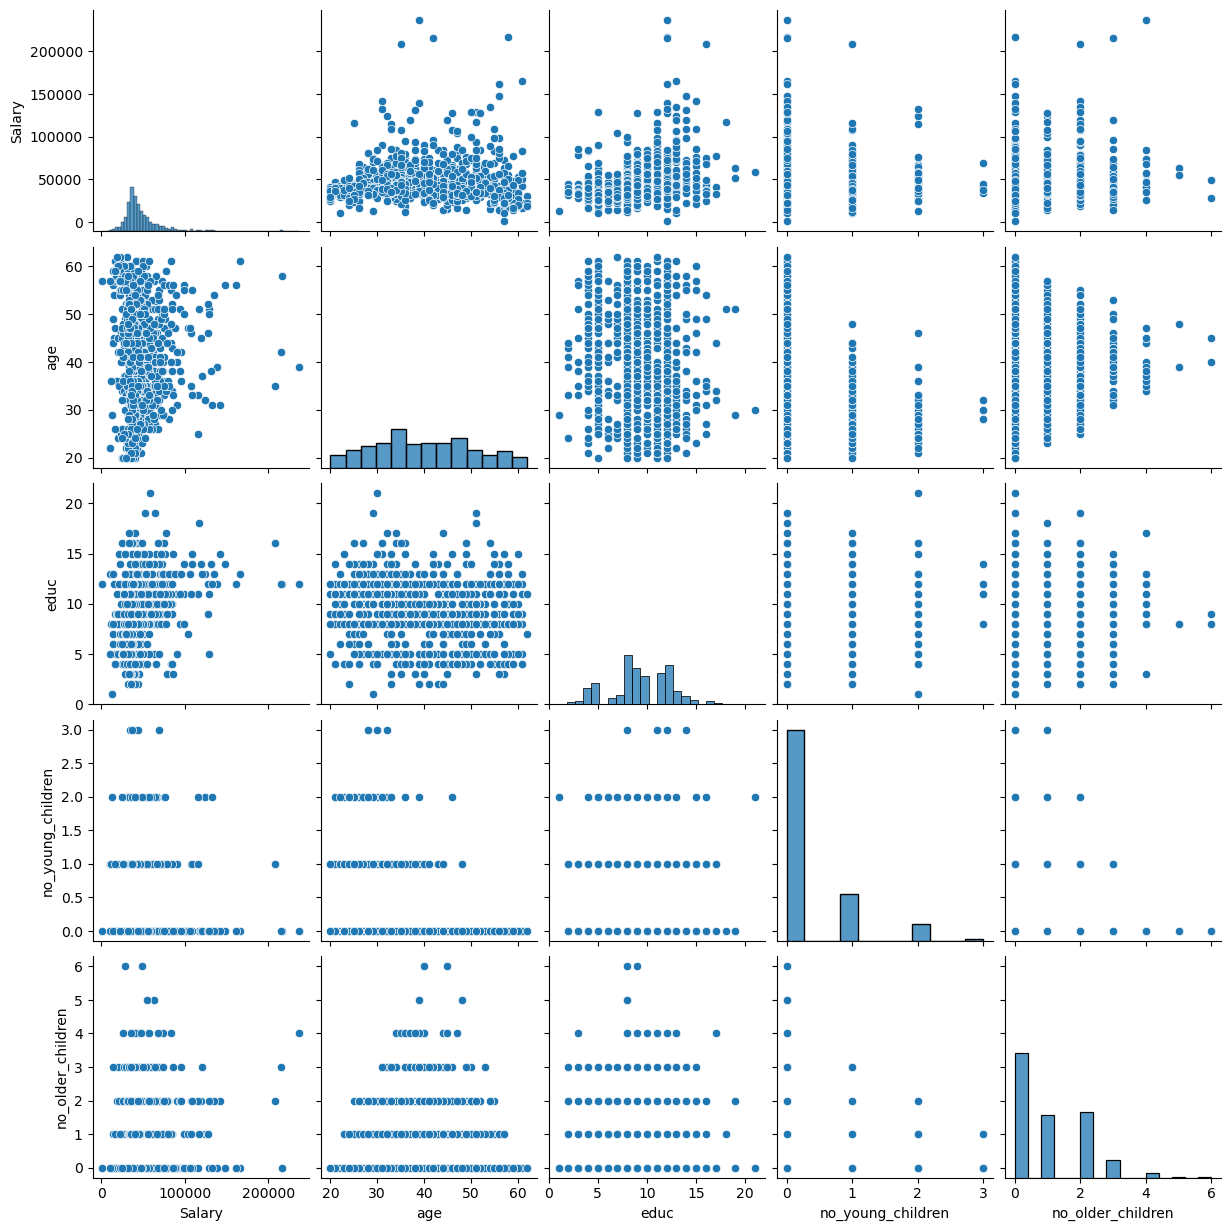

In [164]:
sns.pairplot(df_holiday);

Inferences:

- educ variable is a bit positively correlated with salary variable 
- Top Negative correlation pair is no_young_children and age (-0.52)
- From pairplot, we see that there is no normal distribution for all the variables
- Few of the variables have no correlation with each other, i.e., datapoints are spread wideacross(ex: educ and age). - There might be small amount of correlation for salary and educ but there is no particular trend

## Handling categorical text Variables

In [165]:
df_holiday_all = pd.get_dummies(df_holiday)
df_holiday_all.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_no,Holliday_Package_yes,foreign_no,foreign_yes
0,48412,30,8,1,1,1,0,1,0
1,37207,45,8,0,1,0,1,1,0
2,58022,46,9,0,0,1,0,1,0
3,66503,31,11,2,0,1,0,1,0
4,66734,44,12,0,2,1,0,1,0


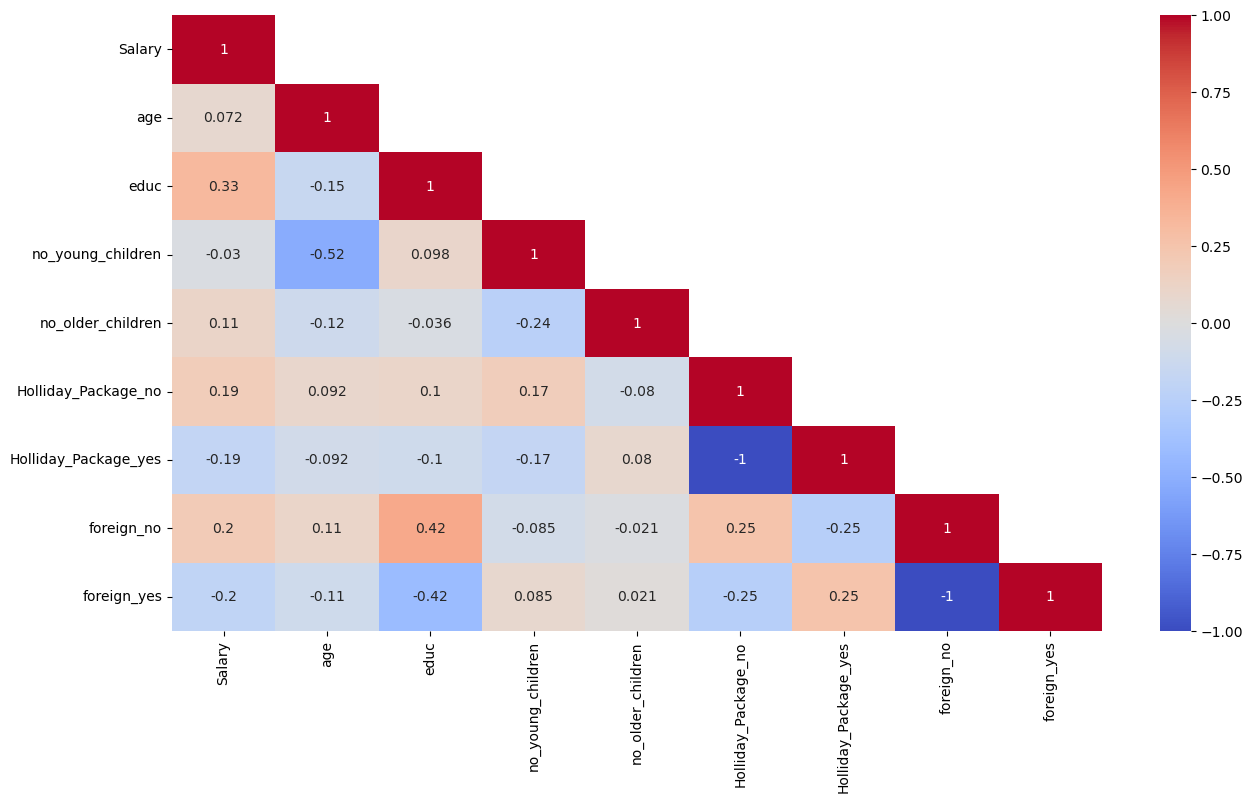

In [166]:
plt.figure(figsize=(15,8))
sns.heatmap(df_holiday_all.corr(),annot=True,mask=np.triu(df_holiday_all.corr(),1), cmap='coolwarm')
plt.show()

In [167]:
df_holiday_dummy = pd.get_dummies(df_holiday, drop_first=True)
df_holiday_dummy.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,1,0
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0


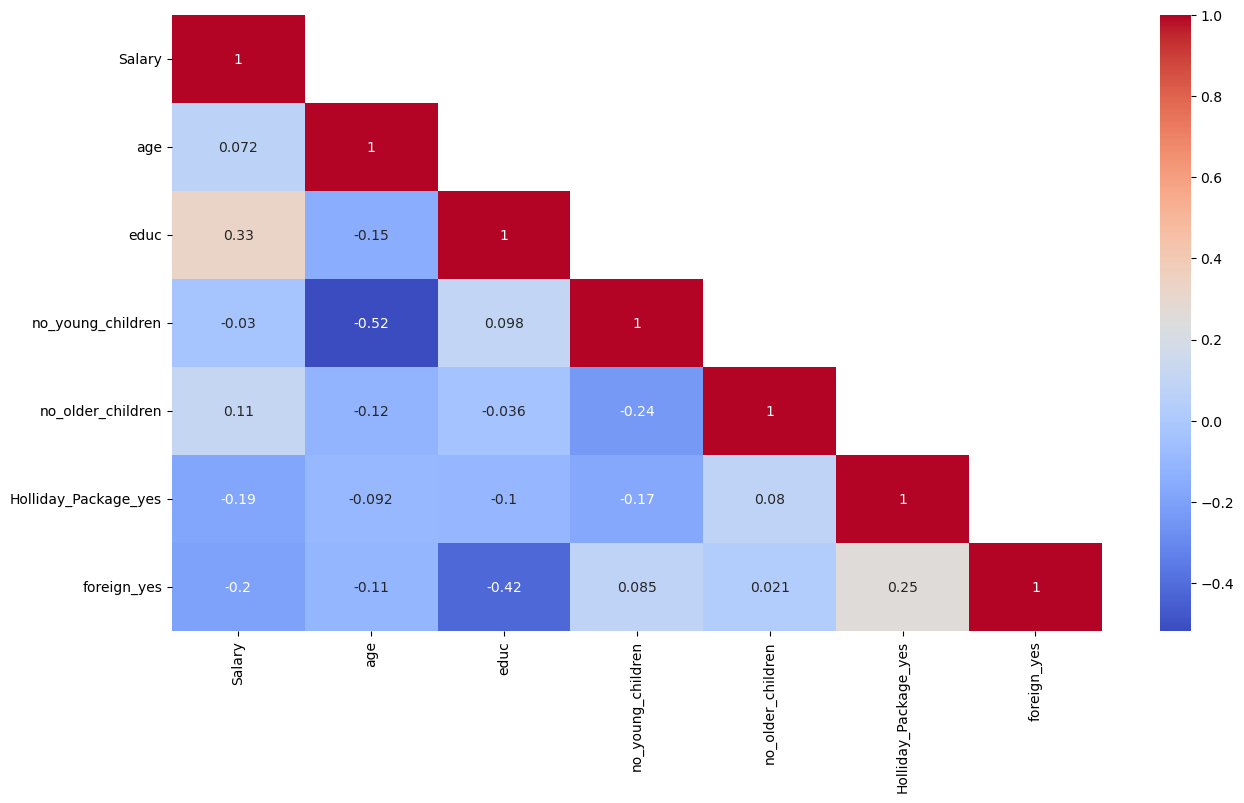

In [168]:
plt.figure(figsize=(15,8))
sns.heatmap(df_holiday_dummy.corr(),annot=True,mask=np.triu(df_holiday_dummy.corr(),1), cmap='coolwarm')
plt.show()

In [169]:
df_holiday_dummy.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,1,0
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0


## Build the Logistic Regression Models - Descriptive approach

#### Let us now go ahead and build the logistic regression model using one variable first.

We will build the Logistic Regression model with only the variable 'Salary' and see how that affects the probability.
But first, let us plot a boxplot to understand the variability in the 'Holiday_Package_yes' with respect to the 'Salary' variable.

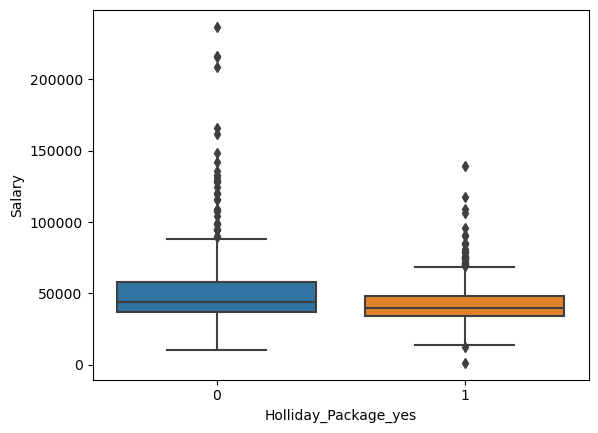

In [170]:
sns.boxplot(x=df_holiday_dummy['Holliday_Package_yes'], y=df_holiday_dummy['Salary'])
plt.show()

We can see that people with high salary tend not to opt for holiday packages and people with less salary are equal in opting and not opting a holiday package

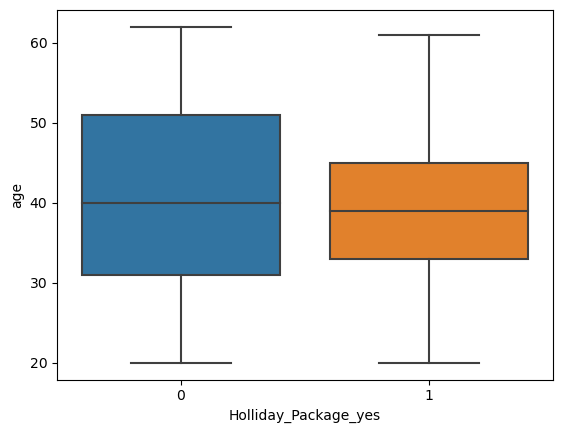

In [171]:
sns.boxplot(x=df_holiday_dummy['Holliday_Package_yes'], y=df_holiday_dummy['age'])
plt.show()

We can see that people with age higher than median are not choosing holiday package

## Model 1: 

In [172]:
import statsmodels.formula.api as SM

In [173]:
model_1 = SM.logit(formula = 'Holliday_Package_yes~Salary', data=df_holiday_dummy).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.670170
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     Holliday_Package_yes   No. Observations:                  872
Model:                            Logit   Df Residuals:                      870
Method:                             MLE   Df Model:                            1
Date:                  Wed, 26 Jun 2024   Pseudo R-squ.:                 0.02863
Time:                          20:30:19   Log-Likelihood:                -584.39
converged:                         True   LL-Null:                       -601.61
Covariance Type:              nonrobust   LLR p-value:                 4.378e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7875      0.190      4.151      0.000       0.416       1.159
Salary     -2.035e-05    3.9e-06     -5.223      0.000    -2.8e-05   -1.27e-05
==============================================================================
"""

In [174]:
def adj_pseudo_r2(model):
    return 1 - (model.llf-model.df_model)/model.llnull   

In [175]:
model_name = []
model_perf = []
variable = []
model_name.append('model 1')
model_perf.append(adj_pseudo_r2(model_1))
variable.append('salary')
adj_pseudo_r2(model_1)

0.02696735766208258

- Adj pseudo r-square value is very less in model 1
- We will add 'age' variable in model 2 and check the performance

## Model 2:

In [176]:
f_2 = 'Holliday_Package_yes~Salary+age'

In [177]:
model_2 = SM.logit(formula=f_2,data=df_holiday_dummy).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.666837
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     Holliday_Package_yes   No. Observations:                  872
Model:                            Logit   Df Residuals:                      869
Method:                             MLE   Df Model:                            2
Date:                  Wed, 26 Jun 2024   Pseudo R-squ.:                 0.03346
Time:                          20:30:19   Log-Likelihood:                -581.48
converged:                         True   LL-Null:                       -601.61
Covariance Type:              nonrobust   LLR p-value:                 1.811e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4070      0.322      4.364      0.000       0.775       2.039
Salary     -2.009e-05   3.93e-06     -5.112      0.000   -2.78e-05   -1.24e-05
age           -0.0159      0.007     -2.402      0.016      -0.029      -0.003
==============================================================================
"""

In [178]:
model_name.append('model 2')
model_perf.append(adj_pseudo_r2(model_2))
variable.append('salary + age')
adj_pseudo_r2(model_2)

0.030134911773561535

- Adj pseudo r-square value is similar for model 2 and 1
- We will add 'foreign_yes' variable in model 2 and check the performance

## Model 3:

In [179]:
f_3 = 'Holliday_Package_yes~Salary+age+foreign_yes'

In [180]:
model_3 = SM.logit(formula=f_3,data=df_holiday_dummy).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.644169
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     Holliday_Package_yes   No. Observations:                  872
Model:                            Logit   Df Residuals:                      868
Method:                             MLE   Df Model:                            3
Date:                  Wed, 26 Jun 2024   Pseudo R-squ.:                 0.06632
Time:                          20:30:19   Log-Likelihood:                -561.72
converged:                         True   LL-Null:                       -601.61
Covariance Type:              nonrobust   LLR p-value:                 3.401e-17
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.7918      0.336      2.359      0.018       0.134       1.450
Salary      -1.544e-05   3.87e-06     -3.987      0.000    -2.3e-05   -7.85e-06
age            -0.0123      0.007     -1.813      0.070      -0.026       0.001
foreign_yes     1.0496      0.171      6.145      0.000       0.715       1.384
===============================================================================
"""

In [181]:
model_name.append('model 3')
model_perf.append(adj_pseudo_r2(model_3))
variable.append('salary + age + foreign_yes')
adj_pseudo_r2(model_3)

0.06132868369980626

## checking vif values before building model 4

In [182]:
def vif_cal(input_data):
    '''
    input_data: Dataframe of features
    '''
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(len(xvar_names)):
        y = x_vars[xvar_names[i]] 
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = SM.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif = round(1/(1-rsq), 2)
        print (xvar_names[i], " VIF = " , vif)

In [183]:
vif_cal(input_data=df_holiday_dummy[['Salary','age','foreign_yes']])

Salary  VIF =  1.04
age  VIF =  1.01
foreign_yes  VIF =  1.05


- Adj pseudo r-square value is not much increased in model 3
- VIF values are below threshold and are not high
- We will build model 4 by adding educ variable

## Model 4:

In [184]:
df_holiday_dummy.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,1,0
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0


In [185]:
f_4 = 'Holliday_Package_yes~Salary+age+foreign_yes+educ'

In [186]:
model_4 = SM.logit(formula=f_4,data=df_holiday_dummy).fit()
model_4.summary()

Optimization terminated successfully.
         Current function value: 0.643544
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     Holliday_Package_yes   No. Observations:                  872
Model:                            Logit   Df Residuals:                      867
Method:                             MLE   Df Model:                            4
Date:                  Wed, 26 Jun 2024   Pseudo R-squ.:                 0.06722
Time:                          20:30:19   Log-Likelihood:                -561.17
converged:                         True   LL-Null:                       -601.61
Covariance Type:              nonrobust   LLR p-value:                 1.132e-16
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4894      0.444      1.103      0.270      -0.380       1.359
Salary      -1.665e-05   4.07e-06     -4.087      0.000   -2.46e-05   -8.66e-06
age            -0.0105      0.007     -1.514      0.130      -0.024       0.003
foreign_yes     1.1282      0.187      6.025      0.000       0.761       1.495
educ            0.0290      0.028      1.042      0.297      -0.026       0.084
===============================================================================
"""

In [187]:
model_name.append('model 4')
model_perf.append(adj_pseudo_r2(model_4))
variable.append('salary + age + foreign_yes + educ')
adj_pseudo_r2(model_4)

0.06057322123706077

In [188]:
vif_cal(input_data=df_holiday_dummy[['Salary','age','foreign_yes','educ']])

Salary  VIF =  1.14
age  VIF =  1.08
foreign_yes  VIF =  1.26
educ  VIF =  1.39


- Adj pseudo r-square value is not increased in model 4
- VIF values are below threshold(2) and are not high
- We will build model 5 by adding no_young_children variable

## Model 5: 

In [189]:
f_5 = 'Holliday_Package_yes~Salary+age+foreign_yes+no_young_children'

In [190]:
model_5 = SM.logit(formula=f_5,data=df_holiday_dummy).fit()
model_5.summary()

Optimization terminated successfully.
         Current function value: 0.602653
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     Holliday_Package_yes   No. Observations:                  872
Model:                            Logit   Df Residuals:                      867
Method:                             MLE   Df Model:                            4
Date:                  Wed, 26 Jun 2024   Pseudo R-squ.:                  0.1265
Time:                          20:30:19   Log-Likelihood:                -525.51
converged:                         True   LL-Null:                       -601.61
Covariance Type:              nonrobust   LLR p-value:                 6.885e-32
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.6725      0.426      6.278      0.000       1.838       3.507
Salary            -1.664e-05   4.08e-06     -4.075      0.000   -2.46e-05   -8.64e-06
age                  -0.0495      0.008     -5.843      0.000      -0.066      -0.033
foreign_yes           1.2124      0.183      6.634      0.000       0.854       1.571
no_young_children    -1.2946      0.169     -7.669      0.000      -1.625      -0.964
=====================================================================================
"""

In [191]:
model_name.append('model 5')
model_perf.append(adj_pseudo_r2(model_5))
variable.append('salary + age + foreign_yes + no_young')
adj_pseudo_r2(model_5)

0.1198422655759851

In [192]:
vif_cal(input_data=df_holiday_dummy[['Salary','age','foreign_yes','no_young_children']])

Salary  VIF =  1.05
age  VIF =  1.38
foreign_yes  VIF =  1.05
no_young_children  VIF =  1.37


- Adj pseudo r-square value is 0.119 for model 5 and 11.9% of variance is explained in the target variable
- VIF values are below threshold(2) and are not high
- We will build model 6 by adding no_older_children variable

## Model 6: 

In [193]:
f_6 = 'Holliday_Package_yes~Salary+age+foreign_yes+no_young_children+no_older_children'

In [194]:
model_6 = SM.logit(formula=f_6,data=df_holiday_dummy).fit()
model_6.summary()

Optimization terminated successfully.
         Current function value: 0.602561
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     Holliday_Package_yes   No. Observations:                  872
Model:                            Logit   Df Residuals:                      866
Method:                             MLE   Df Model:                            5
Date:                  Wed, 26 Jun 2024   Pseudo R-squ.:                  0.1266
Time:                          20:30:19   Log-Likelihood:                -525.43
converged:                         True   LL-Null:                       -601.61
Covariance Type:              nonrobust   LLR p-value:                 4.204e-31
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.7419      0.461      5.953      0.000       1.839       3.645
Salary            -1.644e-05   4.11e-06     -3.999      0.000   -2.45e-05   -8.38e-06
age                  -0.0505      0.009     -5.681      0.000      -0.068      -0.033
foreign_yes           1.2161      0.183      6.644      0.000       0.857       1.575
no_young_children    -1.3191      0.180     -7.323      0.000      -1.672      -0.966
no_older_children    -0.0294      0.073     -0.400      0.689      -0.173       0.115
=====================================================================================
"""

In [195]:
model_name.append('model 6')
model_perf.append(adj_pseudo_r2(model_6))
variable.append('salary + age + foreign_yes + no_young + no_old')
adj_pseudo_r2(model_6)

0.11831319653042405

In [196]:
vif_cal(input_data=df_holiday_dummy[['Salary','age','foreign_yes','no_young_children','no_older_children']])

Salary  VIF =  1.07
age  VIF =  1.51
foreign_yes  VIF =  1.06
no_young_children  VIF =  1.57
no_older_children  VIF =  1.18


In [197]:
model_eval = pd.DataFrame({'model_name': model_name, 'model_perf': model_perf, 'variables' : variable})
model_eval

,model_name,model_perf,variables
0,model 1,0.026967,salary
1,model 2,0.030135,salary + age
2,model 3,0.061329,salary + age + foreign_yes
3,model 4,0.060573,salary + age + foreign_yes + educ
4,model 5,0.119842,salary + age + foreign_yes + no_young
5,model 6,0.118313,salary + age + foreign_yes + no_young + no_old


- Model 5 is better compared to all other models because 11.9% of variance is explained by 4 variables
- In all other models, less variance is explained compared to model 5

## Making Predictions

In [198]:
y_prob_pred_5 = model_5.predict()
y_prob_pred_5[-10:]

array([0.43675204, 0.6845451 , 0.53427987, 0.80539518, 0.80696887,
       0.3641025 , 0.72623814, 0.42300678, 0.71615977, 0.52985926])

In [199]:
y_prob_pred_5_default = 1 - y_prob_pred_5
y_prob_pred_5_default[-10:]

array([0.56324796, 0.3154549 , 0.46572013, 0.19460482, 0.19303113,
       0.6358975 , 0.27376186, 0.57699322, 0.28384023, 0.47014074])

## Predictive Approach

### Splitting the data into train and test.

In [200]:
df_holiday_dummy.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,1,0
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0


In [201]:
Train, Test = train_test_split(df_holiday_dummy, test_size=0.3, random_state=10, 
                               stratify = df_holiday_dummy['Holliday_Package_yes'])

In [202]:
print(Train['Holliday_Package_yes'].value_counts(normalize=True),'\n')
print(Test['Holliday_Package_yes'].value_counts(normalize=True))

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64 

0    0.541985
1    0.458015
Name: Holliday_Package_yes, dtype: float64


In [203]:
from sklearn.linear_model import LogisticRegression

In [204]:
lr = LogisticRegression(penalty='none')

### Using only the Model 4, 5 and 6 variables to build the models on training data

In [205]:
model_sk_4 = LogisticRegression(penalty='none')

model_sk_4 = model_sk_4.fit(Train[['Salary','age','foreign_yes','educ']], Train['Holliday_Package_yes'])

# Predicting on the Training Data
model_sk_4_pred_train = model_sk_4.predict(Train[['Salary','age','foreign_yes','educ']])

# Predicting on the Test Data
model_sk_4_pred_test = model_sk_4.predict(Test[['Salary','age','foreign_yes','educ']])

# Getting probabilities for Test Data
model_sk_4_pred_test_prob = model_sk_4.predict_proba(Test[['Salary','age','foreign_yes','educ']])[:, 1]

In [206]:
print('Accuracy Score of Model 4:',model_sk_4.score(Train[['Salary','age','foreign_yes','educ']],
                                                    Train['Holliday_Package_yes']))


Accuracy Score of Model 4: 0.5229508196721312


In [207]:
model_sk_5 = LogisticRegression(penalty='none')

model_sk_5 = model_sk_5.fit(Train[['Salary','age','foreign_yes','no_young_children']], Train['Holliday_Package_yes'])

# Predicting on the Training Data
model_sk_5_pred_train = model_sk_5.predict(Train[['Salary','age','foreign_yes','no_young_children']])

# Predicting on the Test Data
model_sk_5_pred_test = model_sk_5.predict(Test[['Salary','age','foreign_yes','no_young_children']])

# Getting probabilities for Test Data
model_sk_5_pred_test_prob = model_sk_5.predict_proba(Test[['Salary','age','foreign_yes','no_young_children']])[:, 1]

In [208]:
print('Accuracy Score of Model 5:',model_sk_5.score(Train[['Salary','age','foreign_yes','no_young_children']],
                                                    Train['Holliday_Package_yes']))


Accuracy Score of Model 5: 0.6377049180327868


In [209]:
model_sk_6 = LogisticRegression(penalty='none')

model_sk_6 = model_sk_6.fit(Train[['Salary','age','foreign_yes','no_young_children','no_older_children']], Train['Holliday_Package_yes'])

# Predicting on the Training Data
model_sk_6_pred_train = model_sk_6.predict(Train[['Salary','age','foreign_yes','no_young_children','no_older_children']])

# Predicting on the Test Data
model_sk_6_pred_test = model_sk_6.predict(Test[['Salary','age','foreign_yes','no_young_children','no_older_children']])

# Getting probabilities for Test Data
model_sk_6_pred_test_prob = model_sk_6.predict_proba(Test[['Salary','age','foreign_yes','no_young_children','no_older_children']])[:, 1]

In [210]:
print('Accuracy Score of Model 6:',model_sk_6.score(Train[['Salary','age','foreign_yes','no_young_children',
                                                           'no_older_children']],Train['Holliday_Package_yes']))


Accuracy Score of Model 6: 0.5704918032786885


## Evaluating models based on classification metric(s) of choice

In [211]:
from sklearn.metrics import confusion_matrix, classification_report

#### Model 4

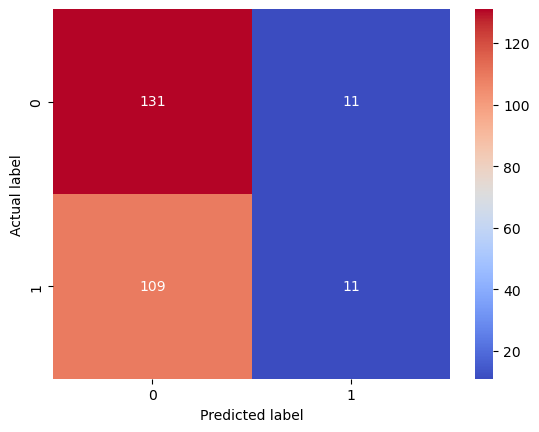

In [212]:
cnf_matrix = confusion_matrix(Test['Holliday_Package_yes'], model_sk_4_pred_test)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt = 'd', cmap = 'coolwarm')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [213]:
print(classification_report(Test['Holliday_Package_yes'], model_sk_4_pred_test))

              precision    recall  f1-score   support

           0       0.55      0.92      0.69       142
           1       0.50      0.09      0.15       120

    accuracy                           0.54       262
   macro avg       0.52      0.51      0.42       262
weighted avg       0.52      0.54      0.44       262



#### model 5

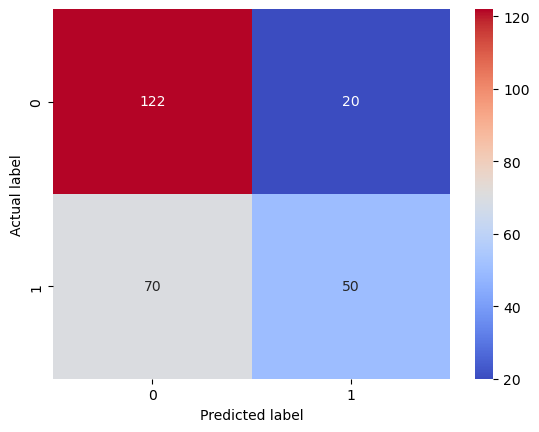

In [214]:
cnf_matrix = confusion_matrix(Test['Holliday_Package_yes'], model_sk_5_pred_test)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt = 'd', cmap = 'coolwarm')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [215]:
print(classification_report(Test['Holliday_Package_yes'], model_sk_5_pred_test))

              precision    recall  f1-score   support

           0       0.64      0.86      0.73       142
           1       0.71      0.42      0.53       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.67      0.66      0.64       262



#### model 6

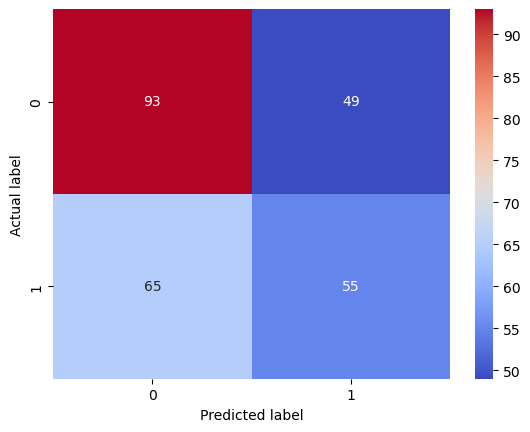

In [216]:
cnf_matrix = confusion_matrix(Test['Holliday_Package_yes'], model_sk_6_pred_test)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt = 'd', cmap = 'coolwarm')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [217]:
print(classification_report(Test['Holliday_Package_yes'], model_sk_6_pred_test))

              precision    recall  f1-score   support

           0       0.59      0.65      0.62       142
           1       0.53      0.46      0.49       120

    accuracy                           0.56       262
   macro avg       0.56      0.56      0.56       262
weighted avg       0.56      0.56      0.56       262



Inferences:

- Model 5 is better model to suggest because, accuracy is important in predictions
- In model 4, recall and f1-score are very low
- Though recall is a bit low in model 5 when compared to model 6, we can propose model 5 as it has good f1-score and accuracy along with recall

## ROC-AUC

In [218]:
from sklearn.metrics import roc_curve, roc_auc_score

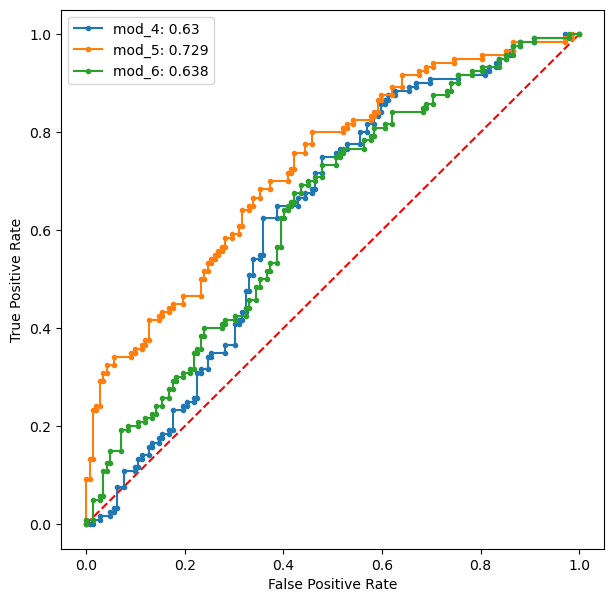

In [219]:
plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], linestyle='--', c = 'r') # Reference line

fpr3, tpr3, thresholds3 = roc_curve(Test['Holliday_Package_yes'], model_sk_4_pred_test_prob) # Model 3
auc = roc_auc_score(Test['Holliday_Package_yes'], model_sk_4_pred_test_prob) # getting AUC for the model
# plot the roc curve for the model
plt.plot(fpr3, tpr3, marker='.', label = 'mod_4: %.2f'% auc)

fpr5, tpr5, thresholds5 = roc_curve(Test['Holliday_Package_yes'], model_sk_5_pred_test_prob) # Model 5
auc = roc_auc_score(Test['Holliday_Package_yes'], model_sk_5_pred_test_prob) # getting AUC for the model
plt.plot(fpr5, tpr5, marker='.', label = 'mod_5: %.3f'% auc)

fpr6, tpr6, thresholds6 = roc_curve(Test['Holliday_Package_yes'], model_sk_6_pred_test_prob) # Model 6
auc = roc_auc_score(Test['Holliday_Package_yes'], model_sk_6_pred_test_prob) # getting AUC for the model
plt.plot(fpr6, tpr6, marker='.', label = 'mod_6: %.3f'% auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

- Model 5 is better in the predictive approach as the area under the curve is high
- Also, accuracy for model 5 is high(63.7) compared to other models